1. ACQUISITION 

1.1 Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc
import sklearn as sk
from sklearn.model_selection import train_test_split
import seaborn as sns

1.2 Reading the dataset into pandas Dataframe

In [2]:
#reading the dataset into the code
heart_data = pd.read_csv(r'C:\Users\user\Desktop\MYOCARDIAL DETECTION PROJECT\DATASETS\Framingham Heart Study\framingham.csv')
heart_data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


Getting insights about the data

In [3]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [4]:
heart_data.shape

(4240, 16)

In [5]:
pd.set_option('display.max_columns', None)  
heart_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
male,4240.0,0.429245,0.495027,0.00,0.00,0.0,1.00,1.0
age,4240.0,49.580189,8.572942,32.00,42.00,49.0,56.00,70.0
education,4135.0,1.979444,1.019791,1.00,1.00,2.0,3.00,4.0
currentSmoker,4240.0,0.494104,0.500024,0.00,0.00,0.0,1.00,1.0
cigsPerDay,4211.0,9.005937,11.922462,0.00,0.00,0.0,20.00,70.0
BPMeds,4187.0,0.029615,0.169544,0.00,0.00,0.0,0.00,1.0
prevalentStroke,4240.0,0.005896,0.076569,0.00,0.00,0.0,0.00,1.0
prevalentHyp,4240.0,0.310613,0.462799,0.00,0.00,0.0,1.00,1.0
diabetes,4240.0,0.025708,0.158280,0.00,0.00,0.0,0.00,1.0
totChol,4190.0,236.699523,44.591284,107.00,206.00,234.0,263.00,696.0


2. DATA FILTERING

In [6]:
#dropping useless columns
heart_data.drop(['education'], axis=1, inplace=True)

In [7]:
#checking for missing values
heart_data.isnull().sum()/len(heart_data) * 100

male               0.000000
age                0.000000
currentSmoker      0.000000
cigsPerDay         0.683962
BPMeds             1.250000
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.179245
sysBP              0.000000
diaBP              0.000000
BMI                0.448113
heartRate          0.023585
glucose            9.150943
TenYearCHD         0.000000
dtype: float64

In [8]:
#dealing with missing values
#dropping rows with missing values
heart_data.dropna(inplace=True)

#checking for missing values again
heart_data.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [9]:
#Checking the relative missingness of the columns
#import missingno as msno
#msno.heatmap(heart_data, figsize=(10, 5), fontsize=12)
#plt.show()

In [10]:
#checking for duplicates
heart_data.duplicated().sum()

0

In [11]:
#checking target value distribution
heart_data.TenYearCHD.value_counts()

TenYearCHD
0    3179
1     572
Name: count, dtype: int64

3. DATA TRANSFORMATION

In [12]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3751 entries, 0 to 4239
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             3751 non-null   int64  
 1   age              3751 non-null   int64  
 2   currentSmoker    3751 non-null   int64  
 3   cigsPerDay       3751 non-null   float64
 4   BPMeds           3751 non-null   float64
 5   prevalentStroke  3751 non-null   int64  
 6   prevalentHyp     3751 non-null   int64  
 7   diabetes         3751 non-null   int64  
 8   totChol          3751 non-null   float64
 9   sysBP            3751 non-null   float64
 10  diaBP            3751 non-null   float64
 11  BMI              3751 non-null   float64
 12  heartRate        3751 non-null   float64
 13  glucose          3751 non-null   float64
 14  TenYearCHD       3751 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 468.9 KB


In [13]:
#renaming the column to show target distribution
heart_data.rename(columns={'TenYearCHD': 'Target'}, inplace=True)
print(heart_data)

      male  age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0        1   39              0         0.0     0.0                0   
1        0   46              0         0.0     0.0                0   
2        1   48              1        20.0     0.0                0   
3        0   61              1        30.0     0.0                0   
4        0   46              1        23.0     0.0                0   
...    ...  ...            ...         ...     ...              ...   
4233     1   50              1         1.0     0.0                0   
4234     1   51              1        43.0     0.0                0   
4237     0   52              0         0.0     0.0                0   
4238     1   40              0         0.0     0.0                0   
4239     0   39              1        30.0     0.0                0   

      prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  \
0                0         0    195.0  106.0   70.0  26.97       80.0   
1

In [14]:
heart_data.shape

(3751, 15)

In [15]:
#checking gender distribution
heart_data['male'].value_counts()

male
0    2081
1    1670
Name: count, dtype: int64

1 -> Male
0 -> Female

In [16]:
#renaming the column to show gender distribution
heart_data.rename(columns={'male': 'Gender'}, inplace=True)

4. EXPLORATORY DATA ANALYSIS

Univariate analysis

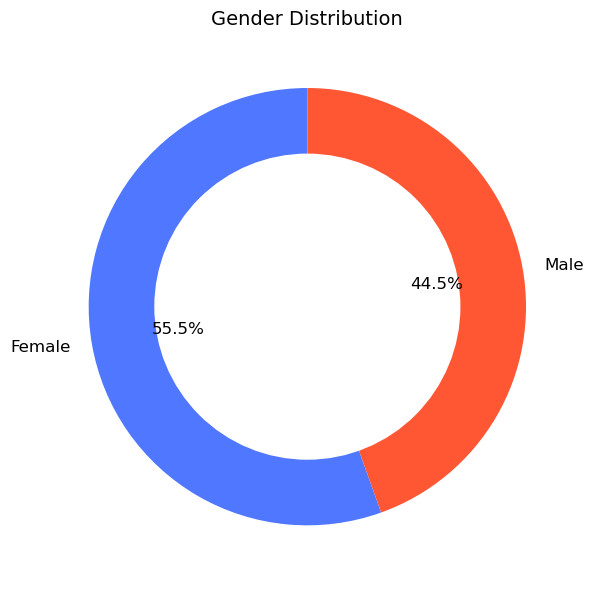

In [17]:
#checking for gender distribution
counts = heart_data['Gender'].value_counts(normalize=True).sort_index()
sizes = counts.values * 100  # Converts to percentages
labels = ['Female' , 'Male']
colors = ['#4F77FF', '#FF5733']

# Create the donut plot
fig, ax = plt.subplots(figsize=(8, 6))
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    colors=colors,
    startangle=90,
    wedgeprops=dict(width=0.4),
    autopct='%1.1f%%',
    textprops={'fontsize': 12}
)
ax.set_title("Gender Distribution", fontsize=14)

#Adding white center circle to create donut effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

plt.tight_layout()
plt.show()

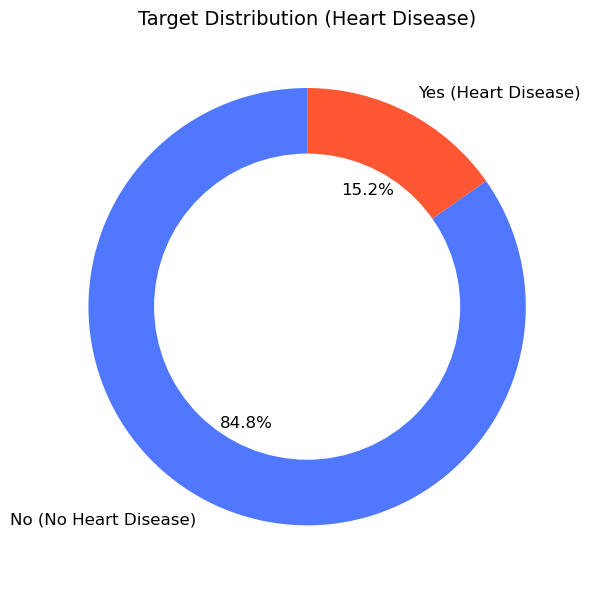

In [18]:
#visulaizing the target value distribution
# Counts the values
counts = heart_data['Target'].value_counts(normalize=True).sort_index()
sizes = counts.values * 100  # Converts to percentages
labels = ['No (No Heart Disease)' , 'Yes (Heart Disease)']
colors = ['#4F77FF', '#FF5733']

# Create the donut plot
fig, ax = plt.subplots(figsize=(8, 6))
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    colors=colors,
    startangle=90,
    wedgeprops=dict(width=0.4),
    autopct='%1.1f%%',
    textprops={'fontsize': 12}
)
ax.set_title("Target Distribution (Heart Disease)", fontsize=14)

# Adding white center circle to create donut effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

plt.tight_layout()
plt.show()


Bivariate analysis

In [19]:
#checking distribution of the features by gender
heart_data.groupby('Gender').mean()

,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Target
Gender,,,,,,,,,,,,,,
0,49.758770,0.397405,5.527631,0.038443,0.005766,0.310428,0.025469,239.629025,133.247477,82.362566,25.535651,76.940413,81.813071,0.121576
1,49.342515,0.601796,13.346108,0.020359,0.005389,0.313772,0.029341,233.562275,131.273054,83.656287,26.148024,74.163473,81.963473,0.191018


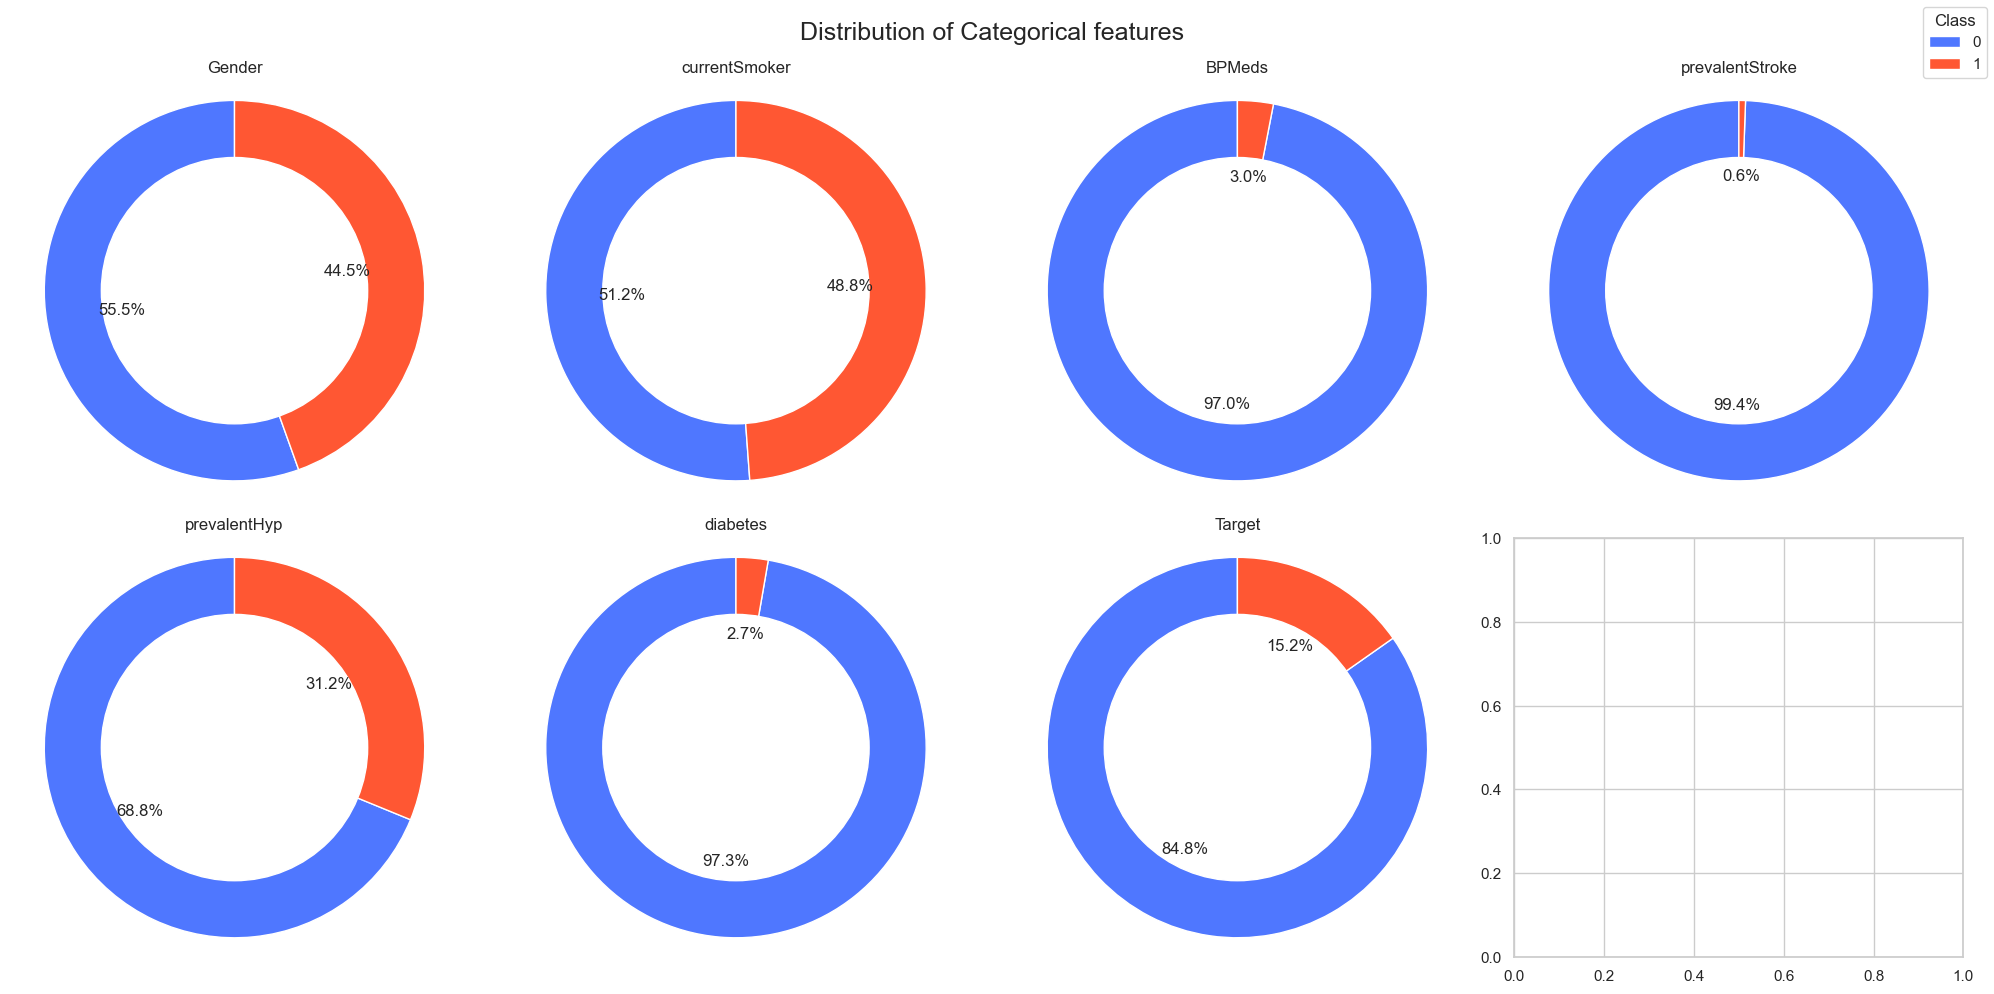

In [20]:
#checking Distributions of the categorical (binary okay) features with the target value
# Plot style
sns.set(style="whitegrid")
colors = ['#4F77FF', '#FF5733']  # Blue = 0, Red = 1

# Categorical features + target
categorical_features = ['Gender', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']
target = 'Target'

# Donut chart
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

for i, var in enumerate(categorical_features + [target]):
    row, col = divmod(i, 4)
    counts = heart_data[var].value_counts(normalize=True).sort_index()
    sizes = counts.values * 100
    wedges, texts, autotexts = axes[row, col].pie(
        sizes,
        startangle=90,
        colors=colors,
        wedgeprops=dict(width=0.4),
        autopct='%1.1f%%'
    )
    axes[row, col].set_title(var)
    centre_circle = plt.Circle((0, 0), 0.70, fc='white')
    axes[row, col].add_artist(centre_circle)
    axes[row, col].axis('equal')

fig.legend(['0', '1'], title="Class", loc="upper right")
plt.suptitle("Distribution of Categorical features", fontsize=18)
plt.tight_layout()
plt.show()


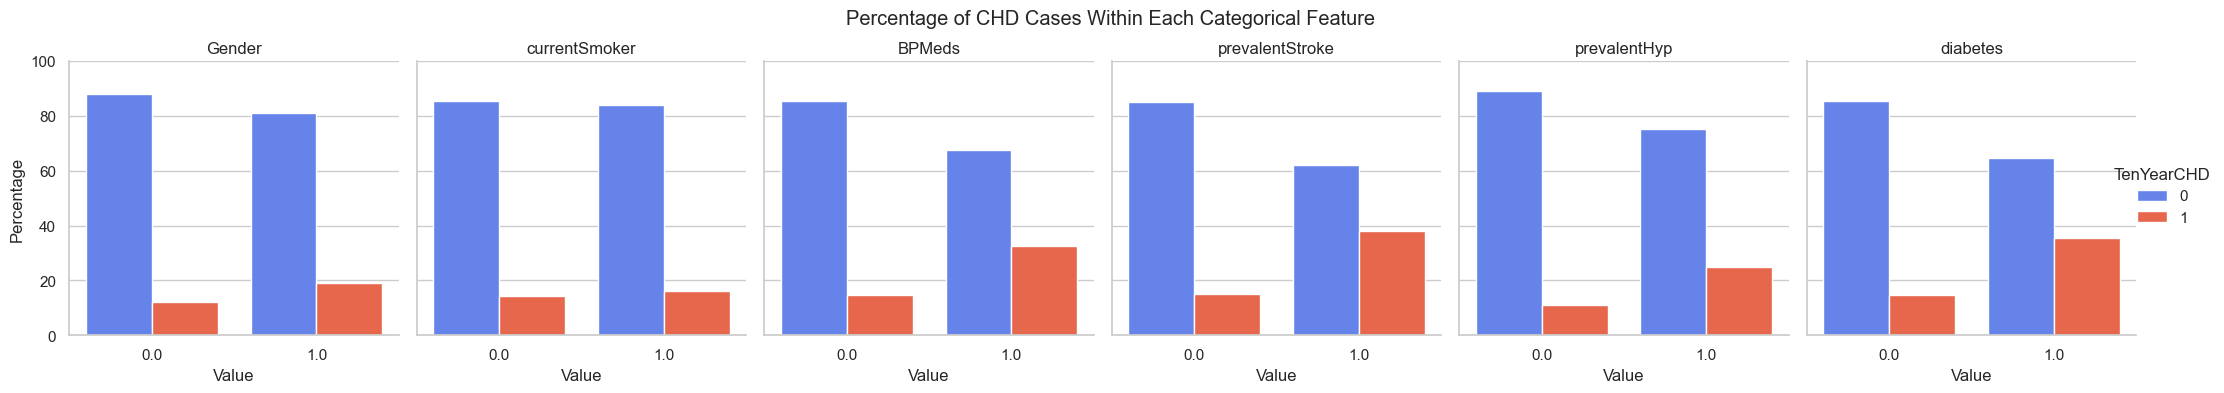

In [21]:
#checking the distribution of target variable with respect to the features
# Plot style
sns.set(style="whitegrid")
colors = ['#4F77FF', '#FF5733']  # 0 = Blue, 1 = Red

# Categorical binary features and target
categorical_features = ['Gender', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']
target = 'Target'

# Prepare data for percentage bar plot
df_perc = pd.DataFrame()

for var in categorical_features:
    # Count group sizes
    grouped = heart_data.groupby([var, target]).size().reset_index(name='count')
    
    # Get percentages within each category of var
    total_per_group = grouped.groupby(var)['count'].transform('sum')
    grouped['percent'] = (grouped['count'] / total_per_group) * 100
    grouped['feature'] = var
    grouped.rename(columns={var: 'value'}, inplace=True)
    
    df_perc = pd.concat([df_perc, grouped], axis=0)

# Plot using catplot (separate subplot per feature)
g = sns.catplot(
    data=df_perc,
    x='value',
    y='percent',
    hue=target,
    col='feature',
    kind='bar',
    palette=colors,
    height=4,
    aspect=0.9
)

g.set_titles("{col_name}")
g.set_axis_labels("Value", "Percentage")
g._legend.set_title("TenYearCHD")
g.set(ylim=(0, 100))

plt.subplots_adjust(top=0.85)
g.fig.suptitle("Percentage of CHD Cases Within Each Categorical Feature")
plt.show()



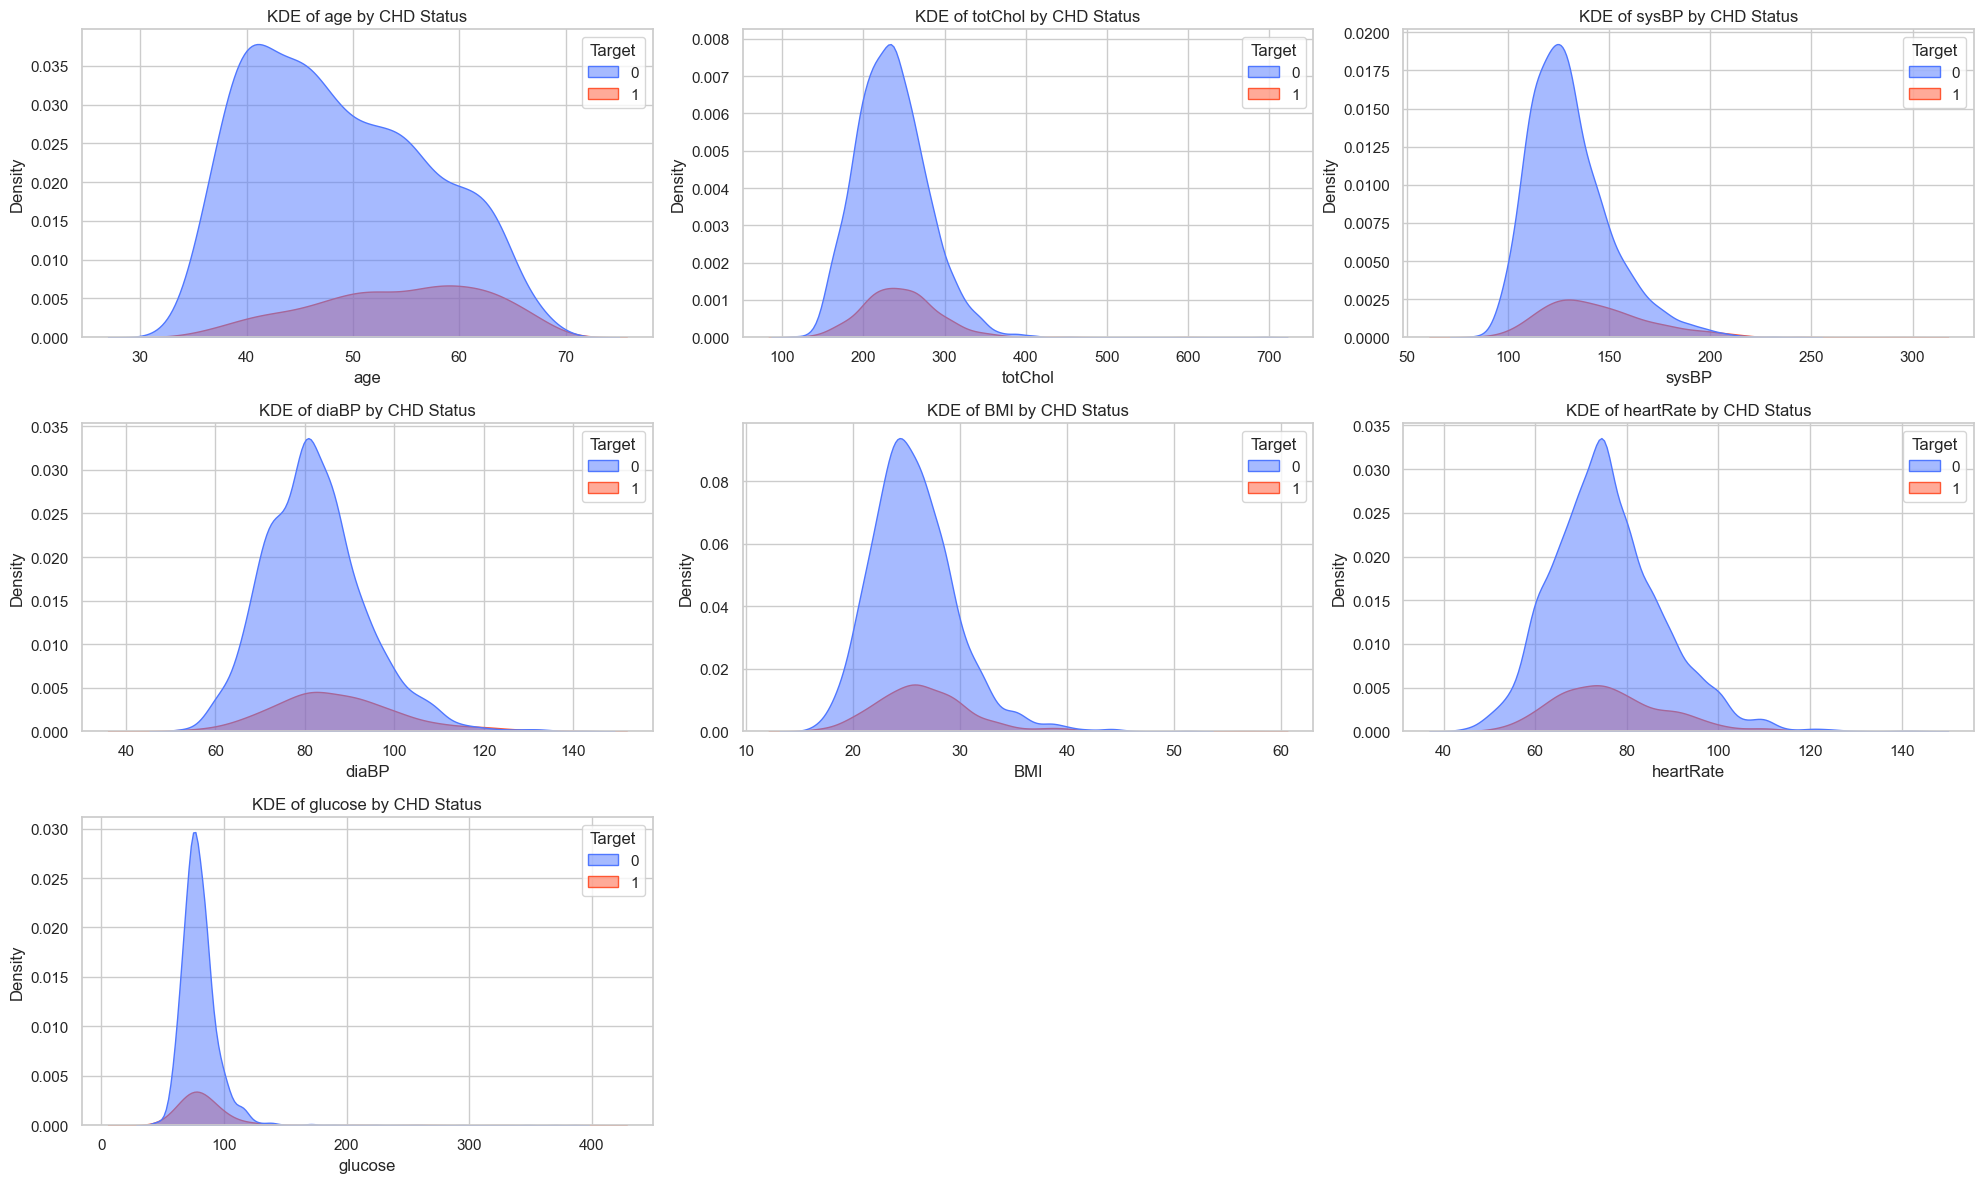

In [22]:
#checking correlation between numerical features and the target variable
# Selecting numerical features
numerical_features = ['age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

# KDE plot
plt.figure(figsize=(20, 12))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.kdeplot(data=heart_data, x=feature, hue='Target', fill=True,
                palette={0: "#4F77FF", 1: "#FF5733"}, alpha=0.5)
    plt.title(f"KDE of {feature} by CHD Status")
    plt.xlabel(feature)
    plt.ylabel("Density")
plt.tight_layout()
plt.show()


Identifying important features using a random classifier

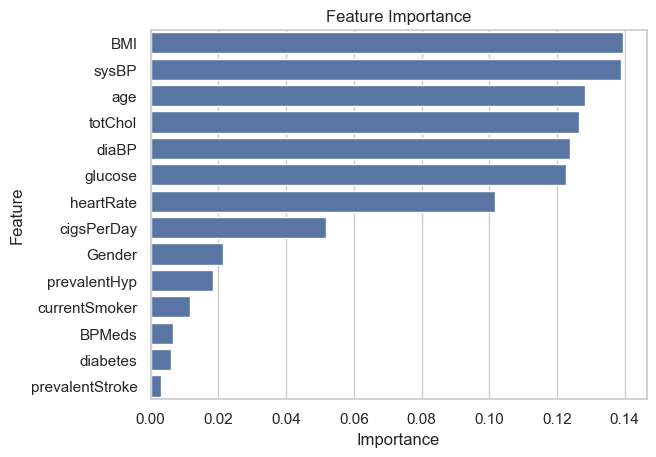

In [23]:
from sklearn.ensemble import RandomForestClassifier

# Define features (X) and target (y)
X = heart_data.drop(columns=["Target"])  
y = heart_data["Target"]

# Train a Random Forest model
model = RandomForestClassifier()
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances}).sort_values(by="Importance", ascending=False)

# Plot feature importances
sns.barplot(data=importance_df, x="Importance", y="Feature")
plt.title("Feature Importance")
plt.show()


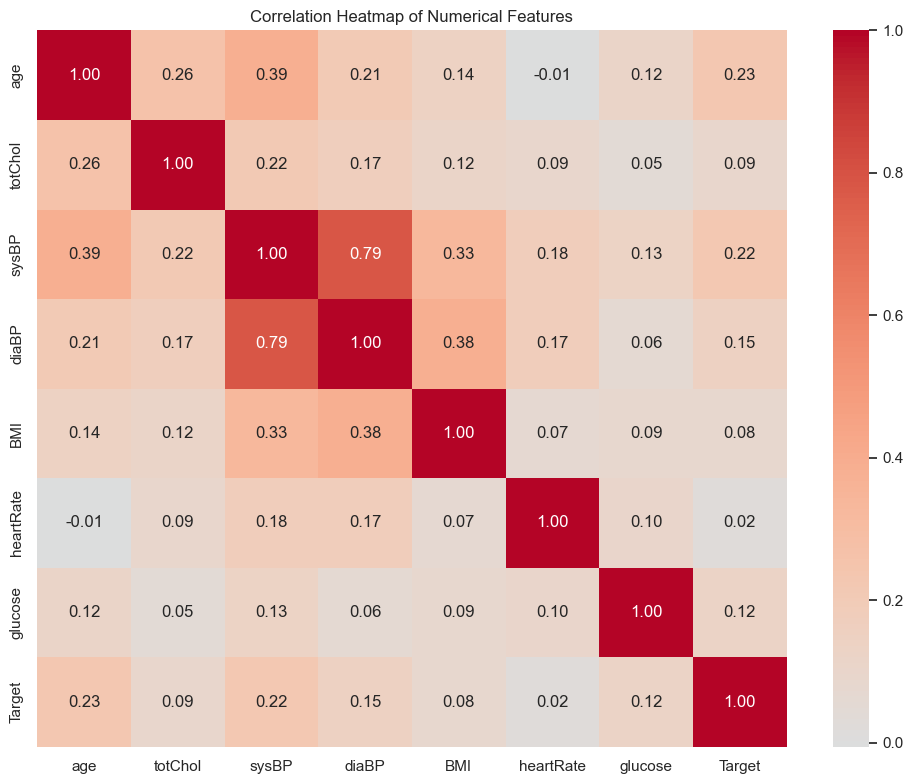

In [24]:
#checking correlation between the features using a correlation heatmap
corr = heart_data[numerical_features + ['Target']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()


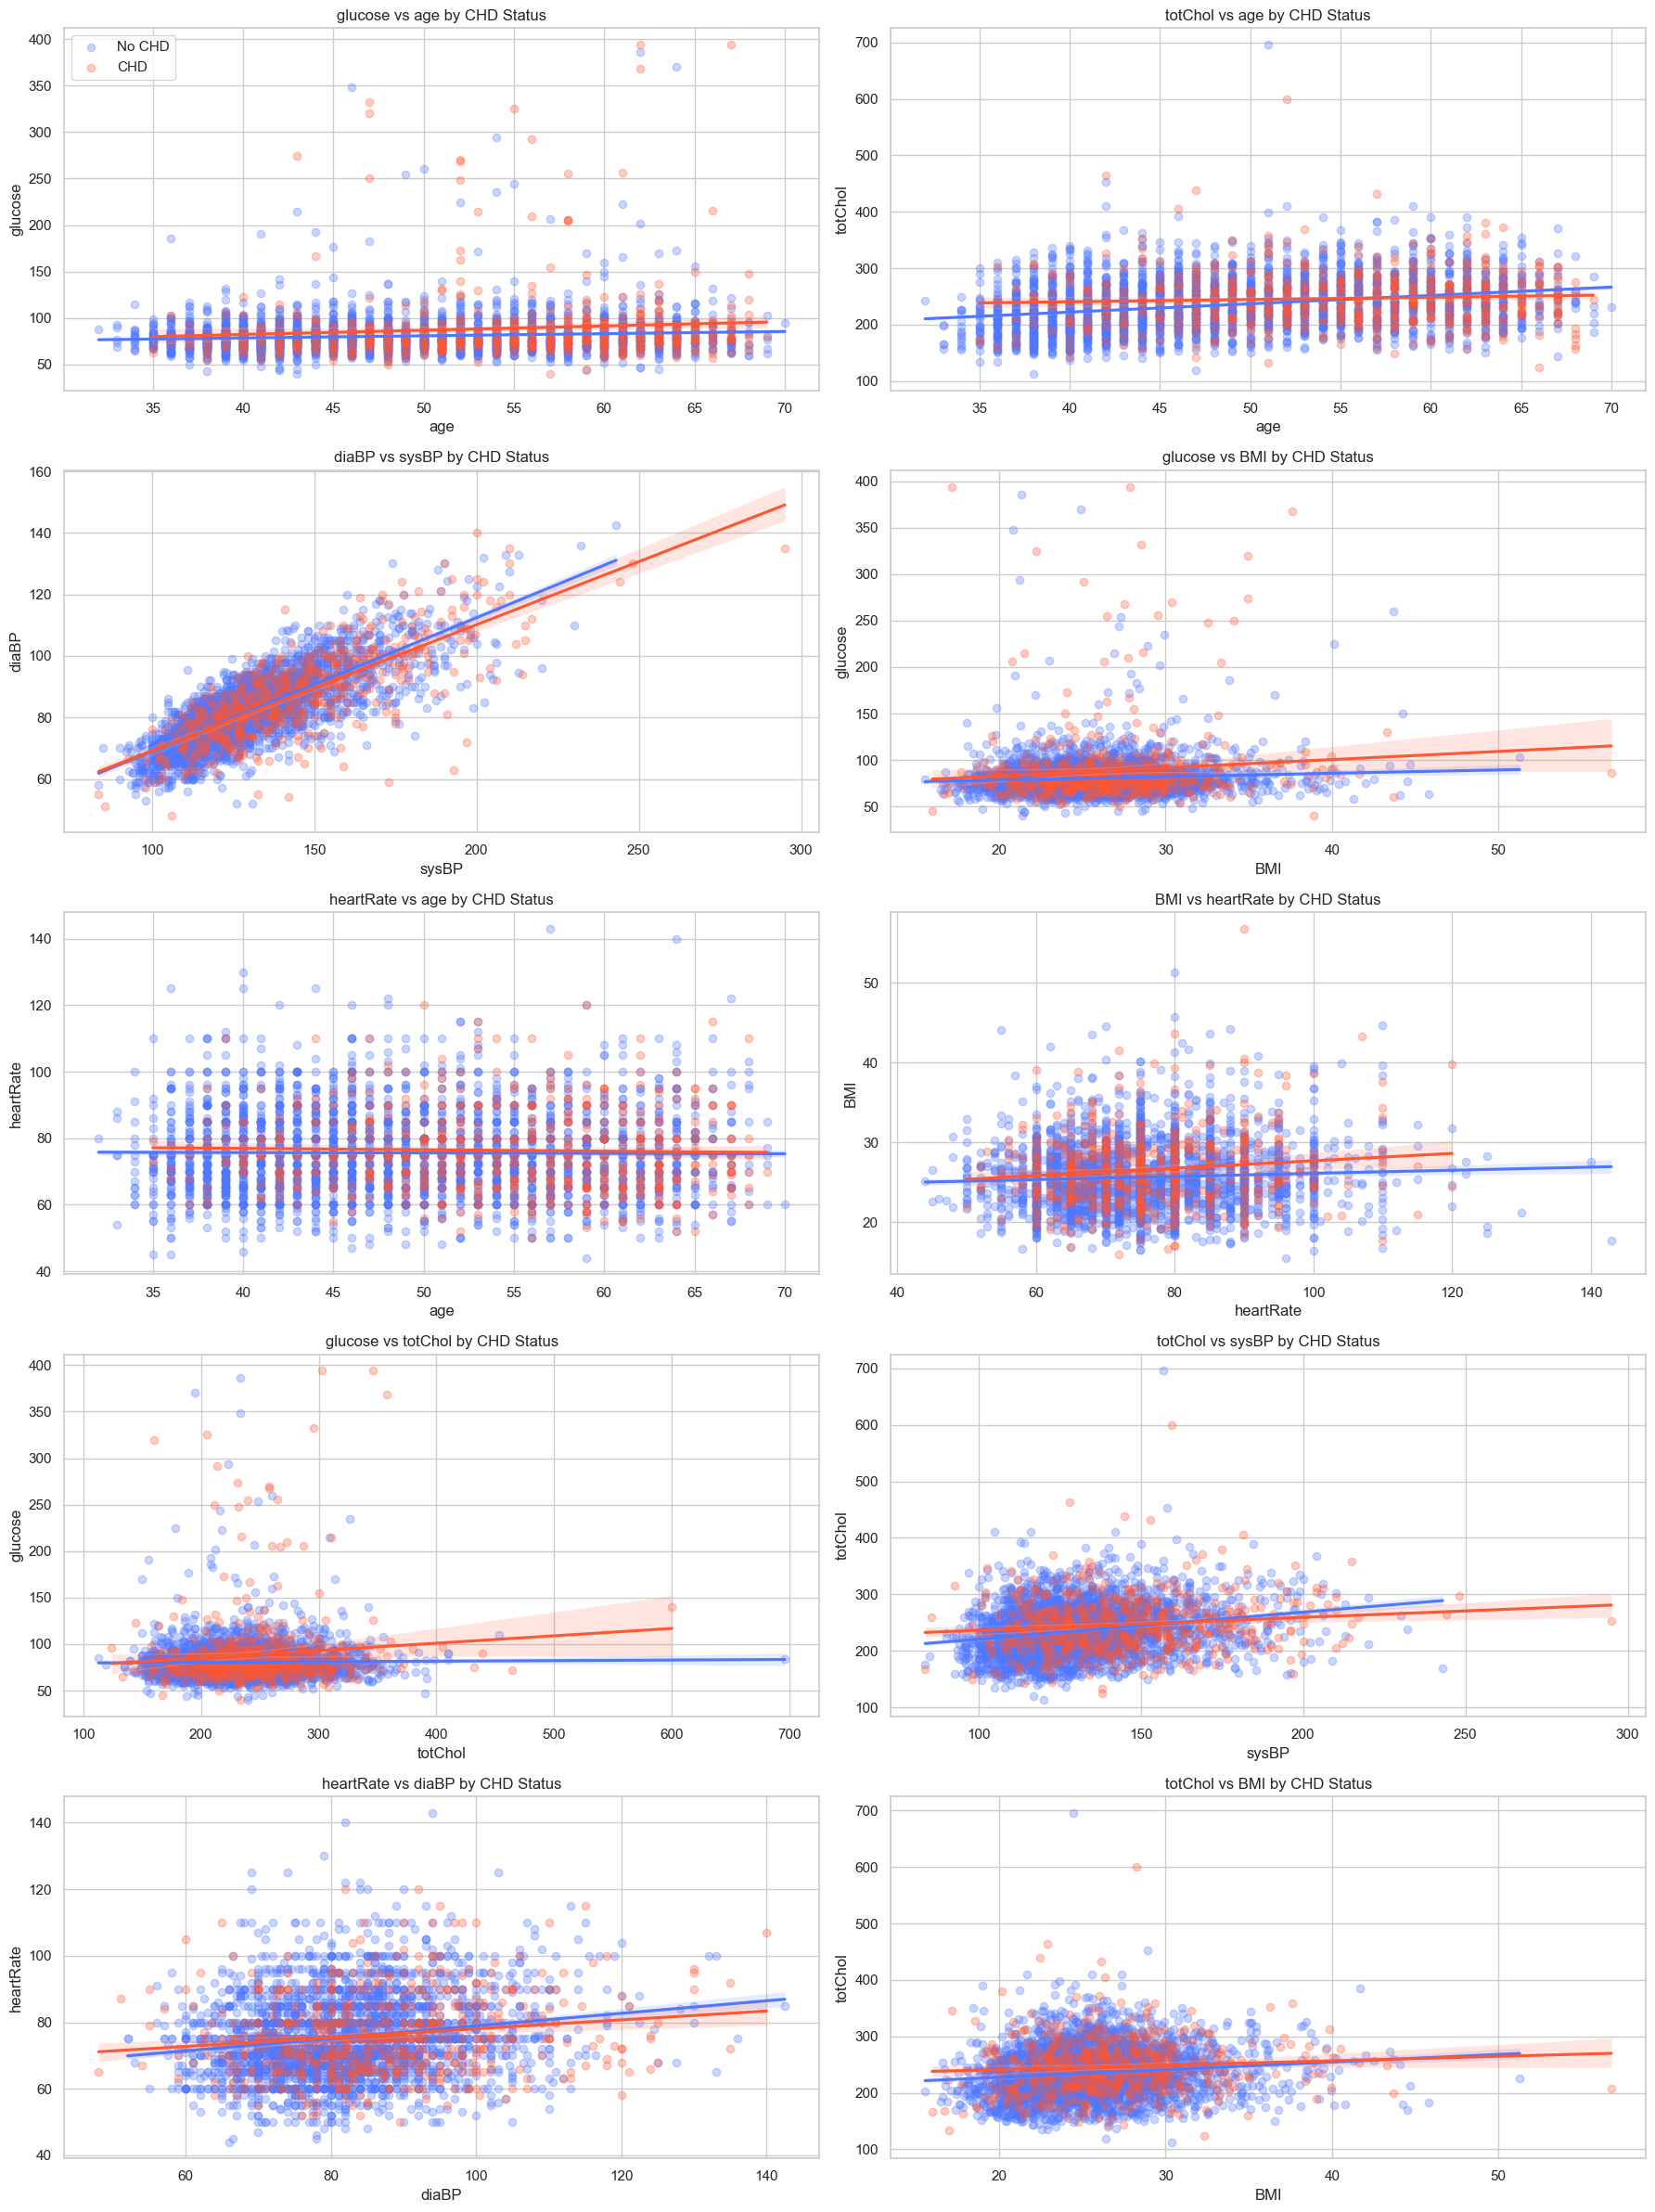

In [25]:
#checking correlation between the features using Regplots
# Pairs to investigate
feature_pairs = [
    ('age', 'glucose'),
    ('age', 'totChol'),
    ('sysBP', 'diaBP'),
    ('BMI', 'glucose'),
    ('age', 'heartRate'),
    ('heartRate', 'BMI'),
    ('totChol', 'glucose'),
    ('sysBP', 'totChol'),
    ('diaBP', 'heartRate'),
    ('BMI', 'totChol')
]

# Plot regplots
plt.figure(figsize=(18, 24))
for i, (x_feat, y_feat) in enumerate(feature_pairs):
    plt.subplot(5, 2, i + 1)
    for target_value, color, label in zip([0, 1], colors, ['No CHD', 'CHD']):
        subset = heart_data[heart_data['Target'] == target_value]
        sns.regplot(
            data=subset,
            x=x_feat,
            y=y_feat,
            scatter_kws={'alpha': 0.3, 'color': color},
            line_kws={"color": color},
            label=label if i == 0 else "",  # Only add legend once
        )
    plt.title(f"{y_feat} vs {x_feat} by CHD Status")
    plt.xlabel(x_feat)
    plt.ylabel(y_feat)
    if i == 0:
        plt.legend()
plt.tight_layout()
plt.show()


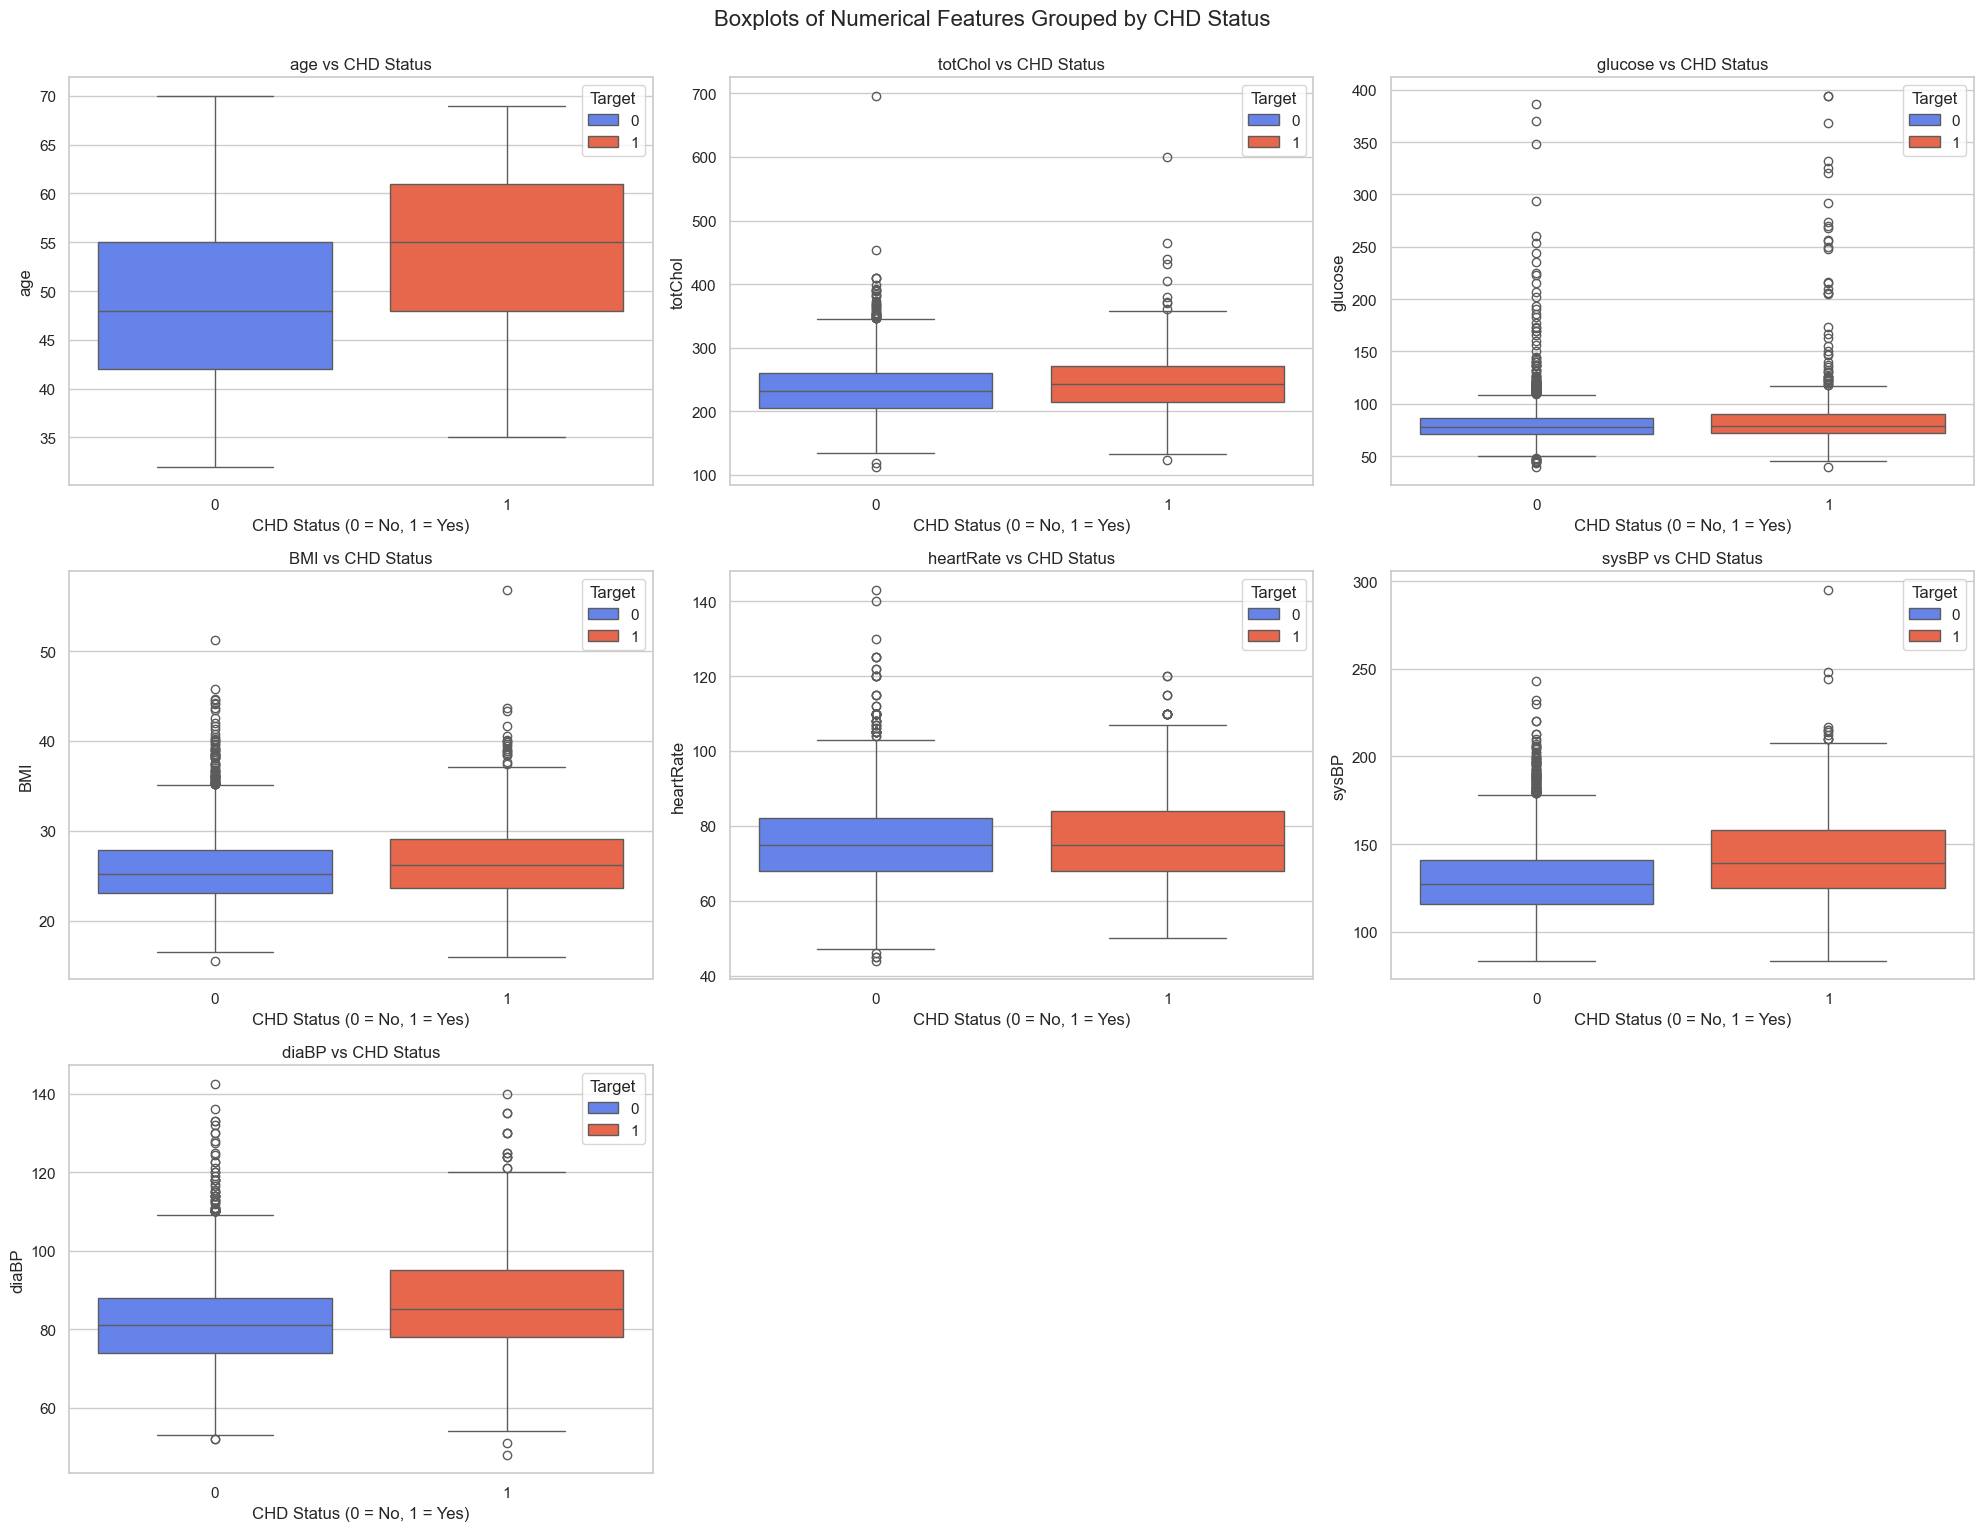

In [26]:
#zooming in on the features with outliers using boxplot
# List of numerical features
numerical_features = ['age', 'totChol', 'glucose', 'BMI', 'heartRate', 'sysBP', 'diaBP']

# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(20, 15))

# Create one boxplot per feature grouped by CHD status
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i+1)
    sns.boxplot(data=heart_data, x='Target', y=feature, hue='Target', palette=['#4F77FF', '#FF5733'])
    plt.title(f"{feature} vs CHD Status", fontsize=12)
    plt.xlabel("CHD Status (0 = No, 1 = Yes)")
    plt.ylabel(feature)

plt.tight_layout()
plt.suptitle("Boxplots of Numerical Features Grouped by CHD Status", fontsize=16, y=1.02)
plt.show()


copying the data

In [27]:
#copying the full dataset for further analysis
heart_data_copy = heart_data.copy()

In [28]:
#cleaning the data of outliers using IQR method
numerical = ['age', 'totChol', 'glucose', 'BMI', 'heartRate', 'sysBP', 'diaBP']

# Compute IQR bounds
Q1 = heart_data_copy[numerical].quantile(0.25)
Q3 = heart_data_copy[numerical].quantile(0.75)
IQR = Q3 - Q1

# Apply IQR filter to remove outliers
heart_data_no_outliers = heart_data_copy[~((heart_data_copy[numerical] < (Q1 - 1.5 * IQR)) |
                            (heart_data_copy[numerical] > (Q3 + 1.5 * IQR))).any(axis=1)]

print(f"Original dataset shape: {heart_data.shape}")
print(f"Cleaned dataset shape: {heart_data_no_outliers.shape}")


Original dataset shape: (3751, 15)
Cleaned dataset shape: (3293, 15)


Creating the test set

In [29]:
#Splitting the dataset into training and testing sets using a unique identifier such as theres no repitition of patients in both sets

#creating a unique identifier for each patient
heart_data_no_outliers["patientid"] = heart_data_no_outliers.index + 1

#Hashing splitting function
from zlib import crc32
def test_set_check(patientid, test_ratio):
    return crc32(np.int64(patientid)) & 0xffffffff < test_ratio * 2**32   

def split_train_test_by_id(data, test_ratio, patientid, random_state=42):
    np.random.seed(random_state)
    ids = data[patientid]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set] 

#splitting the data into training and testing sets
train_set_no_outliers, temp_set = split_train_test_by_id(heart_data_no_outliers, 0.3, "patientid")
print(len(train_set_no_outliers), "training set with no outliers +", len(temp_set), "test + validation")

#splitting the test set into test and validation sets
test_set_no_outliers, val_set_no_outliers = train_test_split(temp_set, test_size=0.3333, random_state=42)
print(len(train_set_no_outliers), "training set +", len(test_set_no_outliers), "test set +", len(val_set_no_outliers), "validation set")

2306 training set with no outliers + 987 test + validation
2306 training set + 658 test set + 329 validation set


C:\Users\user\AppData\Local\Temp\ipykernel_17392\698596627.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_data_no_outliers["patientid"] = heart_data_no_outliers.index + 1


In [30]:
#checking cvd distribution in the training set
train_set_no_outliers['Target'].value_counts(normalize=True)


Target
0    0.859063
1    0.140937
Name: proportion, dtype: float64

In [31]:
#checking training set shape
train_set_no_outliers.shape

(2306, 16)

In [32]:
#defining the target variable and features

# Define target variable
target_col = 'Target'

# Drop non-feature columns
non_features = ['Target', 'patientid']
feature_cols = [col for col in train_set_no_outliers.columns if col not in non_features]

# Define features and labels
X_train_no_outliers = train_set_no_outliers[feature_cols]
y_train_no_outliers = train_set_no_outliers[target_col]

X_test_no_outliers = test_set_no_outliers[feature_cols]
y_test_no_outliers = test_set_no_outliers[target_col]

X_val_no_outliers = val_set_no_outliers[feature_cols]
y_val_no_outliers = val_set_no_outliers[target_col]


Applying SMOTE to the Training set

In [33]:
#applying SMOTE to the Training set
from imblearn.over_sampling import SMOTE
from collections import Counter

# Initializing SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to training set only
X_train_bal_no_outliers, y_train_bal_no_outliers = smote.fit_resample(X_train_no_outliers, y_train_no_outliers)

# Check class balance before and after
print("Before SMOTE:", Counter(y_train_no_outliers))
print("After SMOTE: ", Counter(y_train_bal_no_outliers))


Before SMOTE: Counter({0: 1981, 1: 325})
After SMOTE:  Counter({0: 1981, 1: 1981})


In [34]:
X_test_no_outliers.shape

(658, 14)

TRAINING A BASELINE MODEL TO CHECK PEFORMANCE DIFFERENCE BETWEEN A DATASET WITH OUTLIERS AND ONE WITHOUT


1.1 THIS IS FOR NO OUTLIERS

In [35]:
#scaling the features using StandardScaler, and tarining using a Logistic Regression model
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

scaler = StandardScaler()
X_train_bal_no_outliers_scaled = scaler.fit_transform(X_train_bal_no_outliers)
X_val_no_outliers_scaled = scaler.transform(X_val_no_outliers)
X_test_no_outliers_scaled = scaler.transform(X_test_no_outliers)

log_reg_model = LogisticRegression(max_iter=1000, random_state=42)
log_reg_model.fit(X_train_bal_no_outliers_scaled, y_train_bal_no_outliers)

LogisticRegression(max_iter=1000, random_state=42)

🔍 Evaluation on Validation Set:
[[166 123]
 [ 19  21]]
              precision    recall  f1-score   support

           0      0.897     0.574     0.700       289
           1      0.146     0.525     0.228        40

    accuracy                          0.568       329
   macro avg      0.522     0.550     0.464       329
weighted avg      0.806     0.568     0.643       329

ROC-AUC: 0.6006


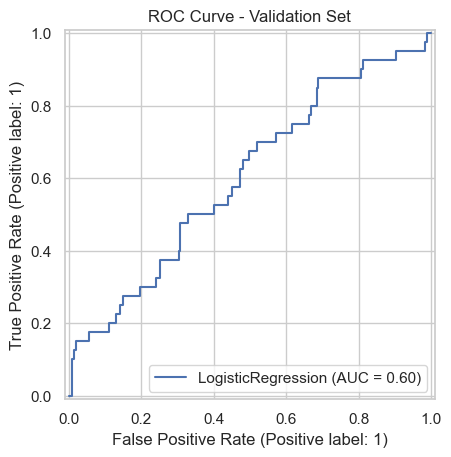

🔍 Evaluation on Test Set:
[[402 181]
 [ 27  48]]
              precision    recall  f1-score   support

           0      0.937     0.690     0.794       583
           1      0.210     0.640     0.316        75

    accuracy                          0.684       658
   macro avg      0.573     0.665     0.555       658
weighted avg      0.854     0.684     0.740       658

ROC-AUC: 0.6783


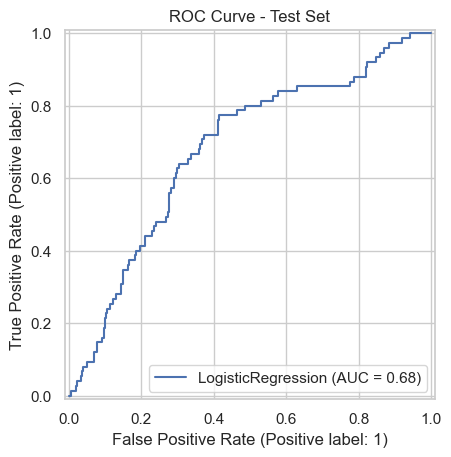

In [36]:
#evaluating the model on the validation set
def evaluate_model(model, X, y, dataset_name="Set"):
    y_pred = model.predict(X)
    y_proba = model.predict_proba(X)[:, 1]
    
    print(f"🔍 Evaluation on {dataset_name}:")
    print(confusion_matrix(y, y_pred))
    print(classification_report(y, y_pred, digits=3))
    print(f"ROC-AUC: {roc_auc_score(y, y_proba):.4f}")
    
    RocCurveDisplay.from_estimator(model, X, y)
    plt.title(f"ROC Curve - {dataset_name}")
    plt.grid(True)
    plt.show()

# Evaluate
evaluate_model(log_reg_model, X_val_no_outliers_scaled, y_val_no_outliers, "Validation Set")
evaluate_model(log_reg_model, X_test_no_outliers_scaled, y_test_no_outliers, "Test Set")


1.2 PREPARING THE DATA WITH OUTLIERS

In [37]:
#creating another copy of the data with outliers for further analysis
heart_data_with_outliers = heart_data.copy()

In [38]:
#Hash-based splitting function
from zlib import crc32
def test_set_check(patientid, test_ratio):
    return crc32(np.int64(patientid)) & 0xffffffff < test_ratio * 2**32   

def split_train_test_by_id(data, test_ratio, patientid, random_state=42):
    np.random.seed(random_state)
    ids = data[patientid]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set] 

# Create a unique identifier for each patient if not already present
heart_data_with_outliers["patientid"] = heart_data_with_outliers.index + 1

#splitting the data into training and testing sets
train_set_with_outliers, temp_set = split_train_test_by_id(heart_data_with_outliers, 0.3, "patientid")
print(len(train_set_no_outliers), "training set with  outliers +", len(temp_set), "test + validation")

#splitting the test set into test and validation sets
test_set_with_outliers, val_set_with_outliers = train_test_split(temp_set, test_size=0.3333, random_state=42)
print(len(train_set_with_outliers), "training set +", len(test_set_with_outliers), "test set +", len(val_set_with_outliers), "validation set")

2306 training set with  outliers + 1135 test + validation
2616 training set + 756 test set + 379 validation set


In [39]:
# Defining features and target
feature_cols = [col for col in train_set_with_outliers.columns if col not in ['Target', 'patientid']]
target_col = 'Target'

X_train_o = train_set_with_outliers[feature_cols]
y_train_o = train_set_with_outliers[target_col]

X_test_o = test_set_with_outliers[feature_cols]
y_test_o = test_set_with_outliers[target_col]

X_val_o = val_set_with_outliers[feature_cols]
y_val_o = val_set_with_outliers[target_col]


In [40]:
#applying SMOTE to the Training set
smote = SMOTE(random_state=42)
X_train_bal_o, y_train_bal_o = smote.fit_resample(X_train_o, y_train_o)
# Check class balance before and after
print("Before SMOTE:", Counter(y_train_o))
print("After SMOTE: ", Counter(y_train_bal_o))

Before SMOTE: Counter({0: 2211, 1: 405})
After SMOTE:  Counter({0: 2211, 1: 2211})


In [41]:
#scaling the features using StandardScaler, and training using a Logistic Regression model
scaler_o = StandardScaler()
X_train_scaled_o = scaler_o.fit_transform(X_train_bal_o)
X_val_scaled_o = scaler_o.transform(X_val_o)
X_test_scaled_o = scaler_o.transform(X_test_o)

#training the model using Logistic Regression
log_reg_model_o = LogisticRegression(max_iter=1000, random_state=42)
log_reg_model_o.fit(X_train_scaled_o, y_train_bal_o)


LogisticRegression(max_iter=1000, random_state=42)

🔍 Evaluation on Validation Set:
[[214 111]
 [ 22  32]]
              precision    recall  f1-score   support

           0      0.907     0.658     0.763       325
           1      0.224     0.593     0.325        54

    accuracy                          0.649       379
   macro avg      0.565     0.626     0.544       379
weighted avg      0.809     0.649     0.701       379

ROC-AUC: 0.6513


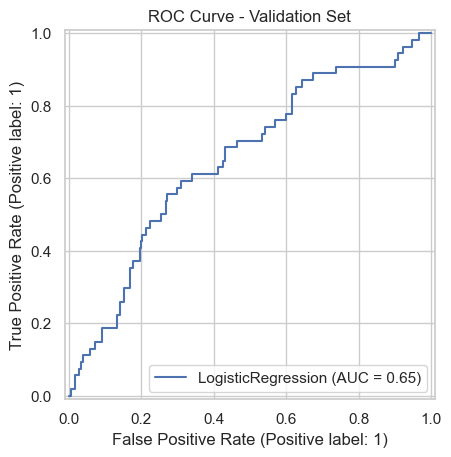

🔍 Evaluation on Test Set:
[[419 224]
 [ 45  68]]
              precision    recall  f1-score   support

           0      0.903     0.652     0.757       643
           1      0.233     0.602     0.336       113

    accuracy                          0.644       756
   macro avg      0.568     0.627     0.546       756
weighted avg      0.803     0.644     0.694       756

ROC-AUC: 0.6704


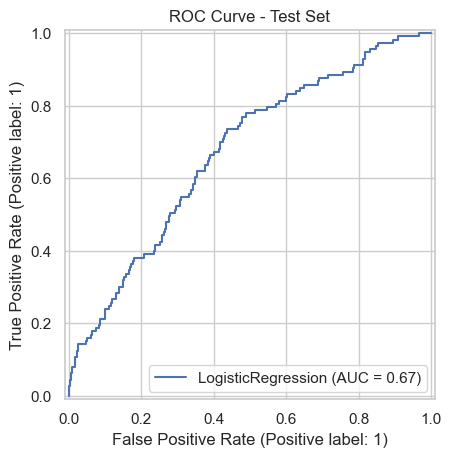

In [42]:
#evaluating the model on the validation set
def evaluate_model(model, X, y, dataset_name="Set"):
    y_pred = model.predict(X)
    y_proba = model.predict_proba(X)[:, 1]
    
    print(f"🔍 Evaluation on {dataset_name}:")
    print(confusion_matrix(y, y_pred))
    print(classification_report(y, y_pred, digits=3))
    print(f"ROC-AUC: {roc_auc_score(y, y_proba):.4f}")
    
    RocCurveDisplay.from_estimator(model, X, y)
    plt.title(f"ROC Curve - {dataset_name}")
    plt.grid(True)
    plt.show()

# Evaluate
evaluate_model(log_reg_model, X_val_scaled_o, y_val_o, "Validation Set")
evaluate_model(log_reg_model, X_test_scaled_o, y_test_o, "Test Set")


TRYING A NON LINEAR CLASSIFIER 

In [43]:
#training the model using random forest classifier (clean)
from sklearn.ensemble import RandomForestClassifier

rf_model_clean = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model_clean.fit(X_train_bal_no_outliers_scaled, y_train_bal_no_outliers)


RandomForestClassifier(class_weight='balanced', random_state=42)

🔍 Evaluation on Validation Set:
[[262  27]
 [ 32   8]]
              precision    recall  f1-score   support

           0      0.891     0.907     0.899       289
           1      0.229     0.200     0.213        40

    accuracy                          0.821       329
   macro avg      0.560     0.553     0.556       329
weighted avg      0.811     0.821     0.815       329

ROC-AUC: 0.6727


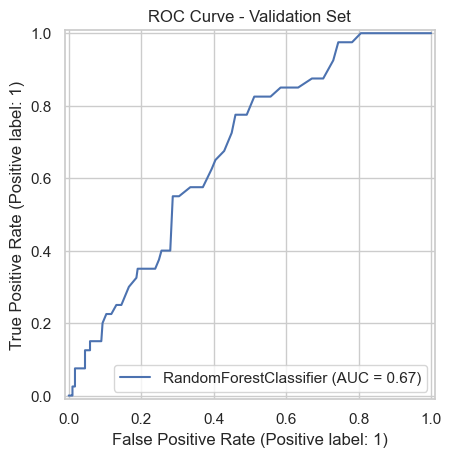

🔍 Evaluation on Test Set:
[[537  46]
 [ 62  13]]
              precision    recall  f1-score   support

           0      0.896     0.921     0.909       583
           1      0.220     0.173     0.194        75

    accuracy                          0.836       658
   macro avg      0.558     0.547     0.551       658
weighted avg      0.819     0.836     0.827       658

ROC-AUC: 0.6600


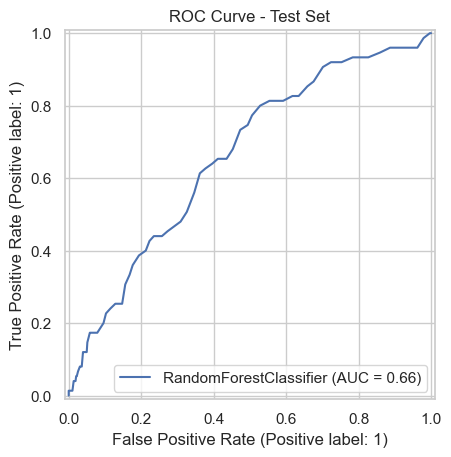

In [44]:
#evaluating the model 
def evaluate_model(model, X, y, dataset_name="Set"):
    y_pred = model.predict(X)
    y_proba = model.predict_proba(X)[:, 1]
    
    print(f"🔍 Evaluation on {dataset_name}:")
    print(confusion_matrix(y, y_pred))
    print(classification_report(y, y_pred, digits=3))
    print(f"ROC-AUC: {roc_auc_score(y, y_proba):.4f}")
    
    RocCurveDisplay.from_estimator(model, X, y)
    plt.title(f"ROC Curve - {dataset_name}")
    plt.grid(True)
    plt.show()

# Evaluate
evaluate_model(rf_model_clean, X_val_no_outliers_scaled, y_val_no_outliers, "Validation Set")
evaluate_model(rf_model_clean, X_test_no_outliers_scaled, y_test_no_outliers, "Test Set")


In [45]:
#training the model using random forest classifier (dirty)
from sklearn.ensemble import RandomForestClassifier

rf_model_dirty = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model_dirty.fit(X_train_scaled_o, y_train_bal_o)


RandomForestClassifier(class_weight='balanced', random_state=42)

🔍 Evaluation on Validation Set:
[[290  35]
 [ 44  10]]
              precision    recall  f1-score   support

           0      0.868     0.892     0.880       325
           1      0.222     0.185     0.202        54

    accuracy                          0.792       379
   macro avg      0.545     0.539     0.541       379
weighted avg      0.776     0.792     0.784       379

ROC-AUC: 0.6466


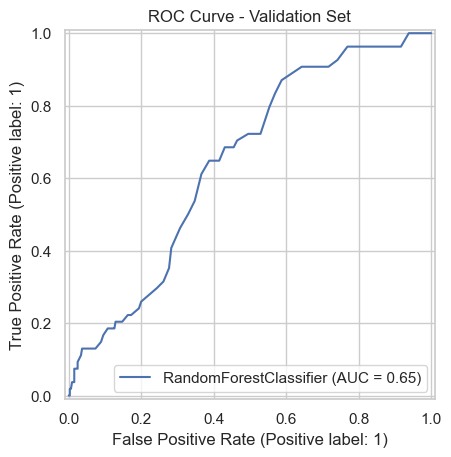

🔍 Evaluation on Test Set:
[[584  59]
 [ 84  29]]
              precision    recall  f1-score   support

           0      0.874     0.908     0.891       643
           1      0.330     0.257     0.289       113

    accuracy                          0.811       756
   macro avg      0.602     0.582     0.590       756
weighted avg      0.793     0.811     0.801       756

ROC-AUC: 0.6968


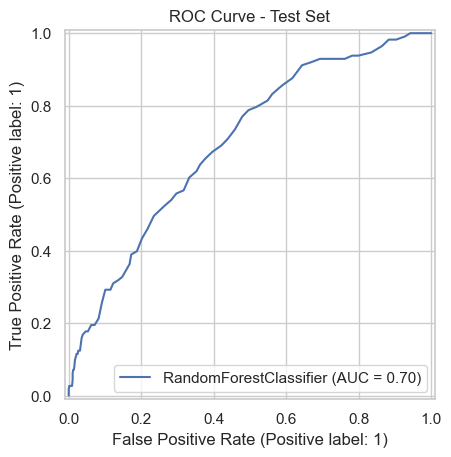

In [46]:
#evaluating the model on the validation set
def evaluate_model(model, X, y, dataset_name="Set"):
    y_pred = model.predict(X)
    y_proba = model.predict_proba(X)[:, 1]
    
    print(f"🔍 Evaluation on {dataset_name}:")
    print(confusion_matrix(y, y_pred))
    print(classification_report(y, y_pred, digits=3))
    print(f"ROC-AUC: {roc_auc_score(y, y_proba):.4f}")
    
    RocCurveDisplay.from_estimator(model, X, y)
    plt.title(f"ROC Curve - {dataset_name}")
    plt.grid(True)
    plt.show()

# Evaluate
evaluate_model(rf_model_dirty, X_val_scaled_o, y_val_o, "Validation Set")
evaluate_model(rf_model_dirty, X_test_scaled_o, y_test_o, "Test Set")

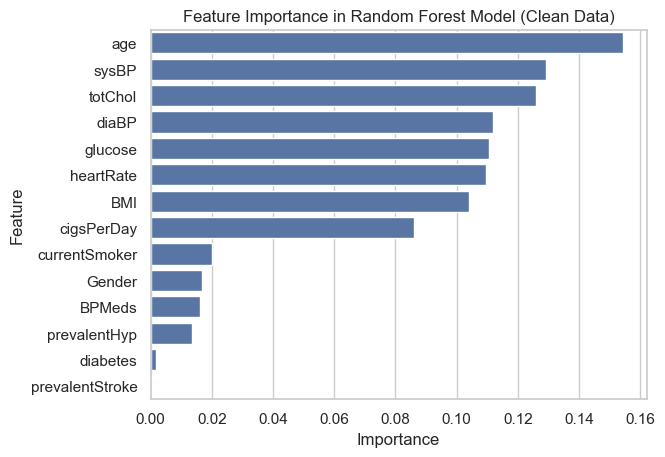

In [47]:
#checking for feature importance in the random forest model
importances_clean = rf_model_clean.feature_importances_
feature_names_clean = X_train_bal_no_outliers.columns

# Plotting feature importances
importances_df_clean = pd.DataFrame({
    'Feature': feature_names_clean,
    'Importance': importances_clean
}).sort_values(by='Importance', ascending=False)    
sns.barplot(data=importances_df_clean, x='Importance', y='Feature')
plt.title("Feature Importance in Random Forest Model (Clean Data)")
plt.show()


Extracting the top 8 features to eliminate redundant features

In [48]:
#extracting the top 8 features to eliminate redundant features
top_features = [
    'age', 'sysBP', 'totChol', 'diaBP', 'glucose', 'heartRate', 'BMI', 'cigsPerDay'
]

# Convert scaled arrays back to DataFrames with correct column names
X_train_scaled_o_df = pd.DataFrame(X_train_scaled_o, columns=feature_cols)
X_val_scaled_o_df = pd.DataFrame(X_val_scaled_o, columns=feature_cols)
X_test_scaled_o_df = pd.DataFrame(X_test_scaled_o, columns=feature_cols)

X_train_reduced = X_train_scaled_o_df[top_features]
X_val_reduced = X_val_scaled_o_df[top_features]
X_test_reduced = X_test_scaled_o_df[top_features]

In [49]:
#retraining the random forest model with reduced features
rf_model_reduced = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model_reduced.fit(X_train_reduced, y_train_bal_o)

RandomForestClassifier(class_weight='balanced', random_state=42)

🔍 Evaluation on Validation Set:
[[280  45]
 [ 39  15]]
              precision    recall  f1-score   support

           0      0.878     0.862     0.870       325
           1      0.250     0.278     0.263        54

    accuracy                          0.778       379
   macro avg      0.564     0.570     0.566       379
weighted avg      0.788     0.778     0.783       379

ROC-AUC: 0.6636


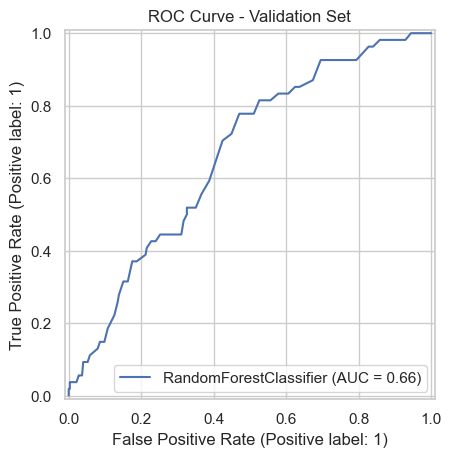

🔍 Evaluation on Test Set:
[[565  78]
 [ 81  32]]
              precision    recall  f1-score   support

           0      0.875     0.879     0.877       643
           1      0.291     0.283     0.287       113

    accuracy                          0.790       756
   macro avg      0.583     0.581     0.582       756
weighted avg      0.787     0.790     0.789       756

ROC-AUC: 0.7006


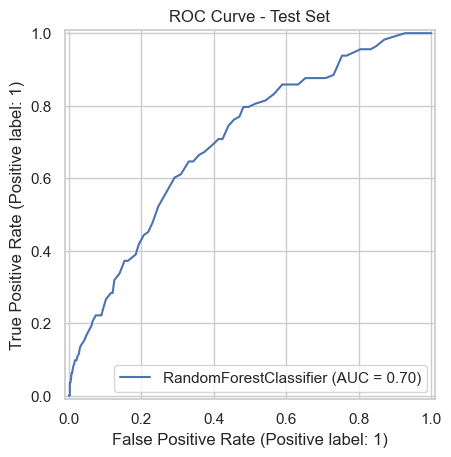

In [50]:
#evaluating the model on the validation set
def evaluate_model(model, X, y, dataset_name="Set"):
    y_pred = model.predict(X)
    y_proba = model.predict_proba(X)[:, 1]
    
    print(f"🔍 Evaluation on {dataset_name}:")
    print(confusion_matrix(y, y_pred))
    print(classification_report(y, y_pred, digits=3))
    print(f"ROC-AUC: {roc_auc_score(y, y_proba):.4f}")
    
    RocCurveDisplay.from_estimator(model, X, y)
    plt.title(f"ROC Curve - {dataset_name}")
    plt.grid(True)
    plt.show()

# Evaluate
evaluate_model(rf_model_reduced, X_val_reduced, y_val_o, "Validation Set")
evaluate_model(rf_model_reduced, X_test_reduced, y_test_o, "Test Set")

Plotting a  Precision-Recall Curves to Find Optimal Balance

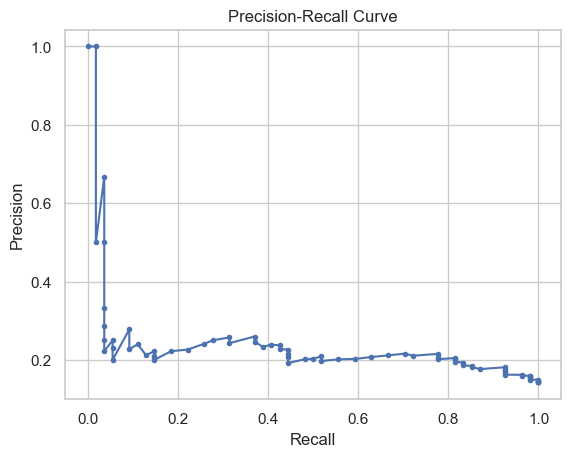

In [51]:
#plotting a Precision-Recall Curves to Find Optimal Balance

from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_val_o, rf_model_reduced.predict_proba(X_val_reduced)[:, 1])

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

In [52]:
#training a linear SVM model
from sklearn.svm import SVC
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train_reduced, y_train_bal_o)


SVC(kernel='linear', probability=True, random_state=42)

🔍 Evaluation on Validation Set:
[[201 124]
 [ 15  39]]
              precision    recall  f1-score   support

           0      0.931     0.618     0.743       325
           1      0.239     0.722     0.359        54

    accuracy                          0.633       379
   macro avg      0.585     0.670     0.551       379
weighted avg      0.832     0.633     0.688       379

ROC-AUC: 0.7251


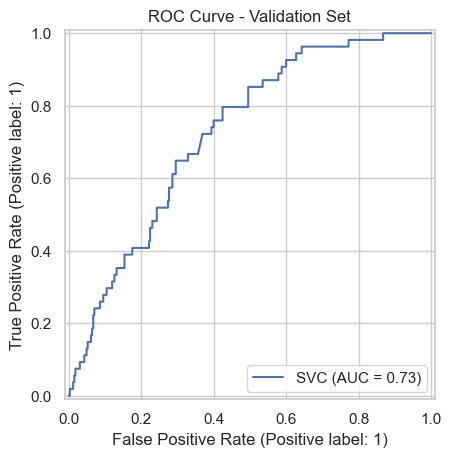

🔍 Evaluation on Test Set:
[[390 253]
 [ 29  84]]
              precision    recall  f1-score   support

           0      0.931     0.607     0.734       643
           1      0.249     0.743     0.373       113

    accuracy                          0.627       756
   macro avg      0.590     0.675     0.554       756
weighted avg      0.829     0.627     0.680       756

ROC-AUC: 0.7326


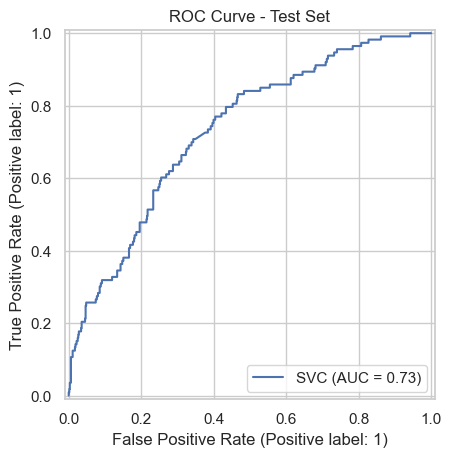

In [53]:
#evaluating the model on the validation set

def evaluate_model(model, X, y, dataset_name="Set"):
    y_pred = model.predict(X)
    y_proba = model.predict_proba(X)[:, 1]
    
    print(f"🔍 Evaluation on {dataset_name}:")
    print(confusion_matrix(y, y_pred))
    print(classification_report(y, y_pred, digits=3))
    print(f"ROC-AUC: {roc_auc_score(y, y_proba):.4f}")
    
    RocCurveDisplay.from_estimator(model, X, y)
    plt.title(f"ROC Curve - {dataset_name}")
    plt.grid(True)
    plt.show()

# Evaluate
evaluate_model(svm_model, X_val_reduced, y_val_o, "Validation Set")
evaluate_model(svm_model, X_test_reduced, y_test_o, "Test Set")

HYPER PARAMETER TUNING OF THE AVAILABLE MODELS

1.1.FOR LINEAR SVM

In [54]:
#adding polynomial features to the dataset
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score

# Use the already reduced features and balanced labels
X_poly = X_train_reduced
y_poly = y_train_bal_o

# Building pipeline with Imputer, Polynomial Features and Linear SVM
pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='linear', class_weight='balanced', probability=True))
])

# Grid Search (optional)
param_grid = {
    'svm__C': [0.01, 0.1, 1, 10]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1', verbose=1, n_jobs=-1)
grid_search.fit(X_poly, y_poly)

# Evaluate on validation set
y_val_pred = grid_search.predict(X_val_reduced)
y_val_prob = grid_search.predict_proba(X_val_reduced)[:, 1]

print("Best Params:", grid_search.best_params_)
print(classification_report(y_val_o, y_val_pred))
print("ROC-AUC Score:", roc_auc_score(y_val_o, y_val_prob))


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Params: {'svm__C': 0.01}
              precision    recall  f1-score   support

           0       0.92      0.60      0.73       325
           1       0.23      0.70      0.34        54

    accuracy                           0.62       379
   macro avg       0.58      0.65      0.54       379
weighted avg       0.83      0.62      0.67       379

ROC-AUC Score: 0.713048433048433


In [55]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, roc_auc_score
from scipy.stats import loguniform

# Define the 8 core features for the SVM
svm_features = ['age', 'sysBP', 'totChol', 'diaBP', 'glucose', 'heartRate', 'BMI', 'cigsPerDay']

# Subset training and validation data
X_train_reduced = X_train_scaled_o_df[svm_features]
X_val_reduced = X_val_scaled_o_df[svm_features]

# Define function for manual interaction terms
def create_interaction_features(X):
    interactions = pd.DataFrame({
        'age_sysBP': X['age'] * X['sysBP'],
        'glucose_BMI': X['glucose'] * X['BMI'],
        'cigsPerDay_totChol': X['cigsPerDay'] * X['totChol'],
        'BMI_heartRate': X['BMI'] * X['heartRate'],
        'diaBP_sysBP': X['diaBP'] * X['sysBP'],  # Newly added interaction
    }, index=X.index)
    return pd.concat([X, interactions], axis=1)

# Define pipeline with interaction transformer
pipeline = Pipeline([
    ('interactions', FunctionTransformer(create_interaction_features, validate=False)),
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='linear', class_weight='balanced', probability=True))
])

# Step 1: GridSearchCV with a narrow range
param_grid = {
    'svm__C': [0.001, 0.01, 0.1]
}

grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=3,
    scoring='f1',
    verbose=1,
    n_jobs=-1
)

# Fit the grid search
grid_search.fit(X_train_reduced, y_train_bal_o)

print("GridSearchCV Best Params:", grid_search.best_params_)
print("GridSearchCV Best F1 Score:", grid_search.best_score_)

# Step 2: RandomizedSearchCV for fine-tuning
best_C = grid_search.best_params_['svm__C']
param_dist = {
    'svm__C': loguniform(max(0.0001, best_C / 2), min(1, best_C * 2))
}

random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=5,
    cv=3,
    scoring='f1',
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit the randomized search
random_search.fit(X_train_reduced, y_train_bal_o)

# Evaluate on the validation set
y_val_pred = random_search.predict(X_val_reduced)
y_val_prob = random_search.predict_proba(X_val_reduced)[:, 1]

print("\nRandomizedSearchCV Best Params:", random_search.best_params_)
print("RandomizedSearchCV Best F1 Score:", random_search.best_score_)
print("\nValidation Set Performance:")
print(classification_report(y_val_o, y_val_pred))
print("ROC-AUC Score:", roc_auc_score(y_val_o, y_val_prob))


Fitting 3 folds for each of 3 candidates, totalling 9 fits
GridSearchCV Best Params: {'svm__C': 0.001}
GridSearchCV Best F1 Score: 0.6850835475801195
Fitting 3 folds for each of 5 candidates, totalling 15 fits

RandomizedSearchCV Best Params: {'svm__C': 0.0013793493374058524}
RandomizedSearchCV Best F1 Score: 0.6883809477589781

Validation Set Performance:
              precision    recall  f1-score   support

           0       0.93      0.58      0.71       325
           1       0.23      0.74      0.35        54

    accuracy                           0.60       379
   macro avg       0.58      0.66      0.53       379
weighted avg       0.83      0.60      0.66       379

ROC-AUC Score: 0.7312820512820513


In [56]:
#threshold optimization

from sklearn.metrics import precision_recall_curve

# Getting probabilities on validation set
y_scores = random_search.predict_proba(X_val_reduced)[:, 1]

# Computing precision, recall, and thresholds
precisions, recalls, thresholds = precision_recall_curve(y_val_o, y_scores)

# Compute F1 at each threshold
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-6)

# Best threshold by F1
best_idx = f1_scores.argmax()
best_threshold = thresholds[best_idx]

print(f"Best threshold by F1-score: {best_threshold:.3f}")
print(f"F1-score at best threshold: {f1_scores[best_idx]:.3f}")


Best threshold by F1-score: 0.578
F1-score at best threshold: 0.393


In [57]:
#evaluating performance at the best threshold

y_val_thresh_pred = (y_scores >= best_threshold).astype(int)

print("\nThreshold-Tuned Classification Report:")
print(classification_report(y_val_o, y_val_thresh_pred))
print("ROC-AUC Score:", roc_auc_score(y_val_o, y_scores))



Threshold-Tuned Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.73      0.81       325
           1       0.28      0.65      0.39        54

    accuracy                           0.72       379
   macro avg       0.60      0.69      0.60       379
weighted avg       0.83      0.72      0.75       379

ROC-AUC Score: 0.7312820512820513


THRESHOLDING IMPROVES PERFORMANCE BUT WHAT IS THE TRADEOFF

In [58]:
#Class weight tuning 

from sklearn.utils.class_weight import compute_class_weight

# Example weight range for class 1 (minority)
weight_values = [1, 2, 3, 5, 7, 10]

param_grid = {
    'svm__C': [random_search.best_params_['svm__C']],  # use best C found earlier
    'svm__class_weight': [{0: 1, 1: w} for w in weight_values]
}

grid_search_weights = GridSearchCV(
    random_search.best_estimator_,
    param_grid,
    cv=3,
    scoring='f1',
    verbose=1,
    n_jobs=-1
)

grid_search_weights.fit(X_train_reduced, y_train_bal_o)

print("Best Class Weights:", grid_search_weights.best_params_)
print("Best F1 Score:", grid_search_weights.best_score_)


Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best Class Weights: {'svm__C': 0.0013793493374058524, 'svm__class_weight': {0: 1, 1: 1}}
Best F1 Score: 0.6883809477589781


In [59]:
#narrowing down the search space for class weights
from scipy.stats import randint


param_dist = {
    'svm__C': [random_search.best_params_['svm__C']],
    'svm__class_weight': [{0: 1, 1: 2} for w in range(3, 8)]  
}

random_search_weights = RandomizedSearchCV(
    random_search.best_estimator_,
    param_distributions=param_dist,
    n_iter=5,
    cv=3,
    scoring='f1',
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_search_weights.fit(X_train_reduced, y_train_bal_o)

print("\nRandomizedSearchCV Best Class Weights:", random_search_weights.best_params_)
print("RandomizedSearchCV Best F1 Score:", random_search_weights.best_score_)

# Evaluate on validation set with best class weights
y_val_pred = random_search_weights.predict(X_val_reduced)
y_val_prob = random_search_weights.predict_proba(X_val_reduced)[:, 1]

print("\nFinal Evaluation After Class Weight Tuning:")
print(classification_report(y_val_o, y_val_pred))
print("ROC-AUC Score:", roc_auc_score(y_val_o, y_val_prob))


Fitting 3 folds for each of 5 candidates, totalling 15 fits

RandomizedSearchCV Best Class Weights: {'svm__class_weight': {0: 1, 1: 2}, 'svm__C': 0.0013793493374058524}
RandomizedSearchCV Best F1 Score: 0.687527728197557

Final Evaluation After Class Weight Tuning:
              precision    recall  f1-score   support

           0       0.97      0.20      0.33       325
           1       0.17      0.96      0.28        54

    accuracy                           0.31       379
   macro avg       0.57      0.58      0.31       379
weighted avg       0.86      0.31      0.32       379

ROC-AUC Score: 0.7204558404558404


In [60]:
#Applying threshold tuning to the best  class weighted SVM model
from sklearn.metrics import precision_recall_curve

# Refit the best SVM model from RandomizedSearchCV
svm_best = random_search.best_estimator_
y_val_scores = svm_best.predict_proba(X_val_reduced)[:, 1]

# Compute precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_val_o, y_val_scores)

# Find best threshold prioritizing recall ( for this condition, recall >= 0.70)
threshold_candidates = [(t, p, r) for t, p, r in zip(thresholds, precision[:-1], recall[:-1]) if r >= 0.70]
best_threshold = max(threshold_candidates, key=lambda x: x[1])[0] if threshold_candidates else 0.5

print(f"Chosen threshold: {best_threshold:.3f}")

# Apply the new threshold
y_val_pred_thresh = (y_val_scores >= best_threshold).astype(int)

# Evaluate
print("\nThreshold-Tuned Classification Report:")
print(classification_report(y_val_o, y_val_pred_thresh))
print("ROC-AUC Score:", roc_auc_score(y_val_o, y_val_scores))


Chosen threshold: 0.518

Threshold-Tuned Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.65      0.76       325
           1       0.25      0.70      0.37        54

    accuracy                           0.66       379
   macro avg       0.59      0.68      0.57       379
weighted avg       0.83      0.66      0.71       379

ROC-AUC Score: 0.7312820512820513


In [61]:
#saving the best model

import joblib

# Save the best model (pipeline) after threshold tuning
model_path = "svm_interaction_pipeline.joblib"
threshold_path = "svm_optimal_threshold.txt"

# Save the pipeline
joblib.dump(svm_best, model_path)
print(f"Model saved to {model_path}")

# Save the threshold to a simple text file
with open(threshold_path, "w") as f:
    f.write(str(best_threshold))
print(f"Threshold saved to {threshold_path}")



Model saved to svm_interaction_pipeline.joblib
Threshold saved to svm_optimal_threshold.txt


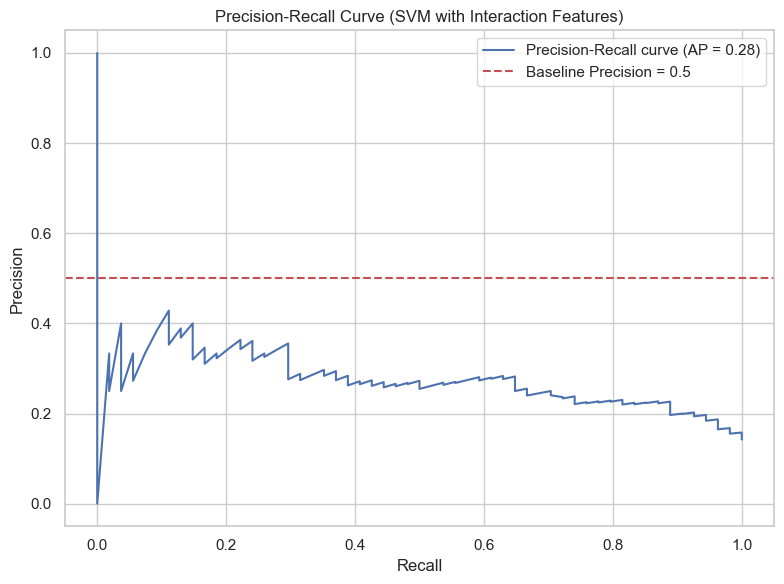

In [62]:
#precision-recall curve for the model

import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

# Get predicted probabilities for positive class
y_scores = svm_best.predict_proba(X_val_reduced)[:, 1]

# Compute precision-recall pairs
precision, recall, thresholds = precision_recall_curve(y_val_o, y_scores)
avg_precision = average_precision_score(y_val_o, y_scores)

# Plot the curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall curve (AP = {avg_precision:.2f})')
plt.axhline(y=0.5, color='r', linestyle='--', label='Baseline Precision = 0.5')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (SVM with Interaction Features)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


1.2 FOR THE RANDOM FOREST

In [63]:
#doing a narrow grid search for n estimators, max depth 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define param grid (small grid to start)
param_grid = {
    'n_estimators': [200, 350],
    'max_depth': [None, 20, 40],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_base = RandomForestClassifier(random_state=42, class_weight='balanced')

grid_search = GridSearchCV(
    rf_base,
    param_grid,
    cv=3,
    scoring='f1',
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train_reduced, y_train_bal_o)

print("Best GridSearch Params:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best GridSearch Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best F1 Score: 0.8720719373812488


In [64]:
#narrowing the search using RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define search distributions
param_dist = {
    'n_estimators': randint(300, 450),          
    'max_depth': [None] + list(range(10, 41, 5)),  # explore specific depths
    'min_samples_split': randint(2, 6),          # around 2
    'min_samples_leaf': randint(1, 4)            # around 1
}

rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)

random_search = RandomizedSearchCV(
    rf_model,
    param_distributions=param_dist,
    n_iter=20,  # try other combinations
    cv=3,
    scoring='f1',
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train_reduced, y_train_bal_o)

print("Best RandomizedSearch Params:", random_search.best_params_)
print("Best F1 Score:", random_search.best_score_)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best RandomizedSearch Params: {'max_depth': 40, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 402}
Best F1 Score: 0.8722788657107176


Confusion Matrix:
 [[282  43]
 [ 40  14]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.87       325
           1       0.25      0.26      0.25        54

    accuracy                           0.78       379
   macro avg       0.56      0.56      0.56       379
weighted avg       0.79      0.78      0.78       379

ROC-AUC Score: 0.6756410256410257


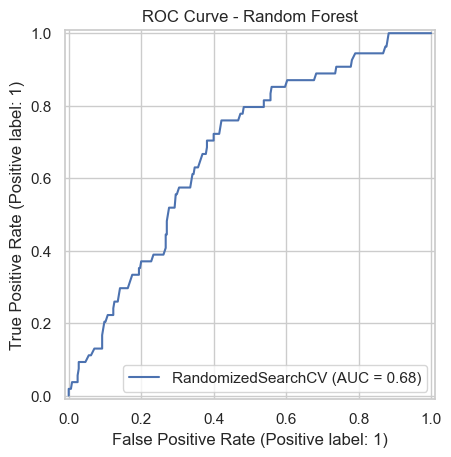

In [65]:
#Evaluating the best Random Forest model on the validation set

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Predict on validation set
y_val_pred_rf = random_search.predict(X_val_reduced)
y_val_prob_rf = random_search.predict_proba(X_val_reduced)[:, 1]

# Print confusion matrix and classification report
print("Confusion Matrix:\n", confusion_matrix(y_val_o, y_val_pred_rf))
print("\nClassification Report:\n", classification_report(y_val_o, y_val_pred_rf))

# ROC-AUC Score
roc_auc_rf = roc_auc_score(y_val_o, y_val_prob_rf)
print("ROC-AUC Score:", roc_auc_rf)

# Plot ROC Curve
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(random_search, X_val_reduced, y_val_o)
plt.title("ROC Curve - Random Forest")
plt.grid(True)
plt.show()

In [66]:
#Using the validation set predictions to find the optimal threshold
from sklearn.metrics import precision_recall_curve, classification_report, confusion_matrix, roc_auc_score

#Predicting probabilities on the validation set using the best RF model
y_val_rf_prob = random_search.predict_proba(X_val_reduced)[:, 1]

#Calculating precision, recall, and thresholds
precisions, recalls, thresholds = precision_recall_curve(y_val_o, y_val_rf_prob)

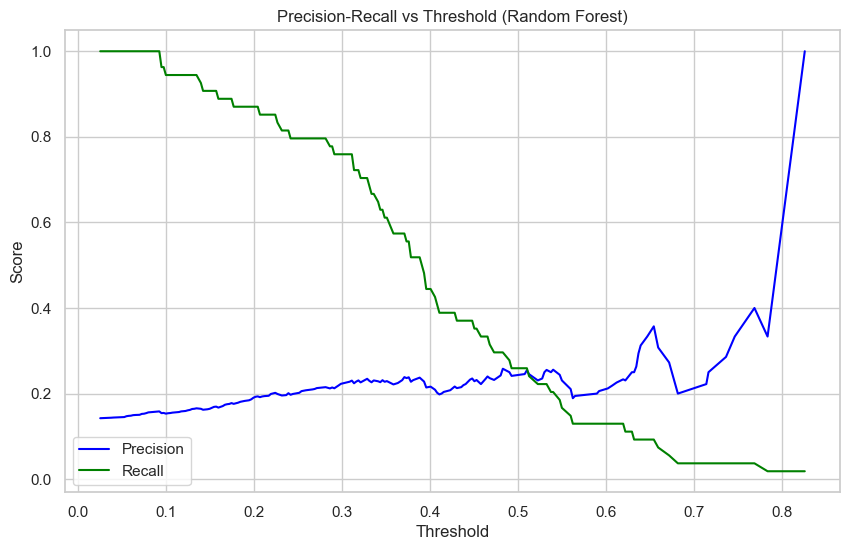

In [67]:
#plotting the precision and recall vs threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions[:-1], label='Precision', color='blue')
plt.plot(thresholds, recalls[:-1], label='Recall', color='green')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall vs Threshold (Random Forest)')
plt.legend()
plt.grid(True)
plt.show()


Best threshold by F1 score: 0.311
Precision: 0.230, Recall: 0.759, F1: 0.353

Threshold-Tuned Evaluation:
Confusion Matrix:
 [[188 137]
 [ 13  41]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.58      0.71       325
           1       0.23      0.76      0.35        54

    accuracy                           0.60       379
   macro avg       0.58      0.67      0.53       379
weighted avg       0.83      0.60      0.66       379

ROC-AUC Score: 0.6756410256410257


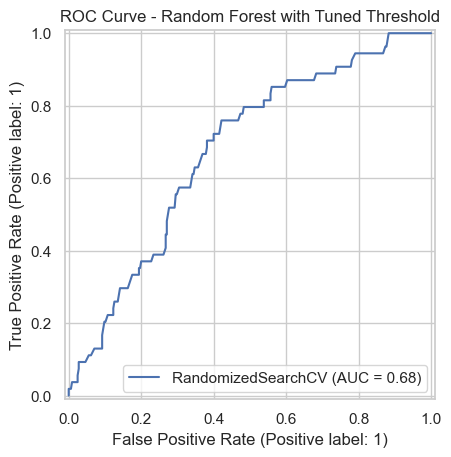

In [68]:
#choosing the threshold that balances the precision and recall
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-8)
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]

print(f"\nBest threshold by F1 score: {best_threshold:.3f}")
print(f"Precision: {precisions[best_idx]:.3f}, Recall: {recalls[best_idx]:.3f}, F1: {f1_scores[best_idx]:.3f}")

#Applying the threshold and evaluate
y_val_rf_tuned = (y_val_rf_prob >= best_threshold).astype(int)

#Evaluation
print("\nThreshold-Tuned Evaluation:")
print("Confusion Matrix:\n", confusion_matrix(y_val_o, y_val_rf_tuned))
print("\nClassification Report:\n", classification_report(y_val_o, y_val_rf_tuned))
print("ROC-AUC Score:", roc_auc_score(y_val_o, y_val_rf_prob))

#plotting the ROC AUC curve
RocCurveDisplay.from_estimator(random_search, X_val_reduced, y_val_o)
plt.title("ROC Curve - Random Forest with Tuned Threshold")
plt.grid(True)
plt.show()


In [69]:
#saving the model
import joblib

# Bundle your trained RF model and the threshold
model_bundle = {
    "model": random_search.best_estimator_,
    "threshold": best_threshold,
    "features": top_features
}

# Save locally
joblib.dump(model_bundle, "rf_threshold_tuned_model.joblib")


['rf_threshold_tuned_model.joblib']


=== Linear SVM (Tuned) Evaluation ===
Confusion Matrix:
 [[211 114]
 [ 16  38]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.65      0.76       325
           1       0.25      0.70      0.37        54

    accuracy                           0.66       379
   macro avg       0.59      0.68      0.57       379
weighted avg       0.83      0.66      0.71       379

ROC-AUC Score: 0.7312820512820513

=== Random Forest (Tuned) Evaluation ===
Confusion Matrix:
 [[188 137]
 [ 13  41]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.58      0.71       325
           1       0.23      0.76      0.35        54

    accuracy                           0.60       379
   macro avg       0.58      0.67      0.53       379
weighted avg       0.83      0.60      0.66       379

ROC-AUC Score: 0.6756410256410257


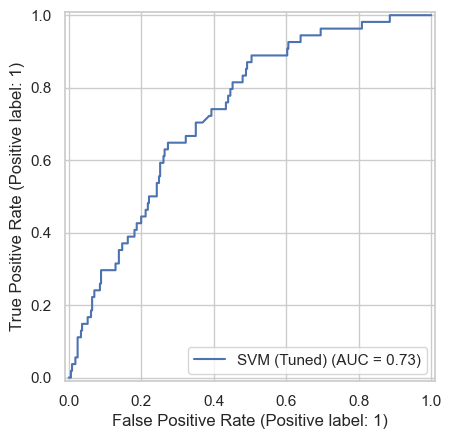

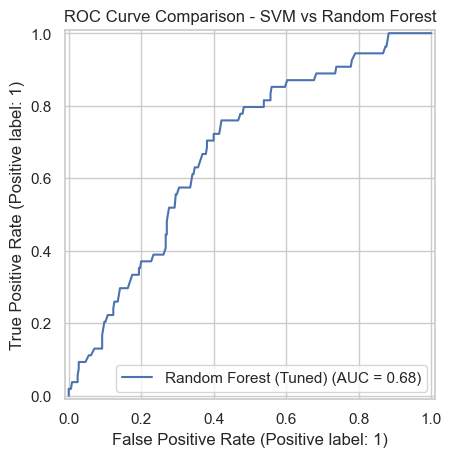

In [70]:
#comparing the RF and SVM models on the validation set 
# Load SVM model (pipeline) and threshold
svm_model = joblib.load("svm_interaction_pipeline.joblib")
with open("svm_optimal_threshold.txt", "r") as f:
    svm_threshold = float(f.read().strip())

# Load RF model bundle
rf_bundle = joblib.load("rf_threshold_tuned_model.joblib")
rf_model = rf_bundle['model']
rf_threshold = rf_bundle['threshold']
rf_features = rf_bundle['features']

# Ensure exact feature match in the right order
X_val_rf = X_val_reduced.copy()

# Predicting probabilities
# SVM
X_val_svm_input = X_val_scaled_o_df[['age', 'sysBP', 'totChol', 'diaBP', 'glucose', 'heartRate', 'BMI', 'cigsPerDay']].copy()

y_val_svm_prob = svm_model.predict_proba(X_val_svm_input)[:, 1]
y_val_svm_tuned = (y_val_svm_prob >= svm_threshold).astype(int)

# RF
y_val_rf_prob = rf_model.predict_proba(X_val_rf)[:, 1]
y_val_rf_tuned = (y_val_rf_prob >= rf_threshold).astype(int)

# Evaluation function
def evaluate_model(name, y_true, y_pred, y_prob):
    print(f"\n=== {name} Evaluation ===")
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))
    print("ROC-AUC Score:", roc_auc_score(y_true, y_prob))

# Run evaluations
evaluate_model("Linear SVM (Tuned)", y_val_o, y_val_svm_tuned, y_val_svm_prob)
evaluate_model("Random Forest (Tuned)", y_val_o, y_val_rf_tuned, y_val_rf_prob)

#plot ROC AUC for the models
RocCurveDisplay.from_estimator(svm_model, X_val_svm_input, y_val_o, name="SVM (Tuned)")
RocCurveDisplay.from_estimator(rf_model, X_val_rf, y_val_o, name="Random Forest (Tuned)")
plt.title("ROC Curve Comparison - SVM vs Random Forest")
plt.grid(True)
plt.legend()
plt.show()




=== SVM Model Evaluation ===
Cross-validated F1 scores: [0.10526316 0.33333333 0.34782609 0.32       0.375     ]
Mean F1 score: 0.296 ± 0.097


<Figure size 1000x600 with 0 Axes>

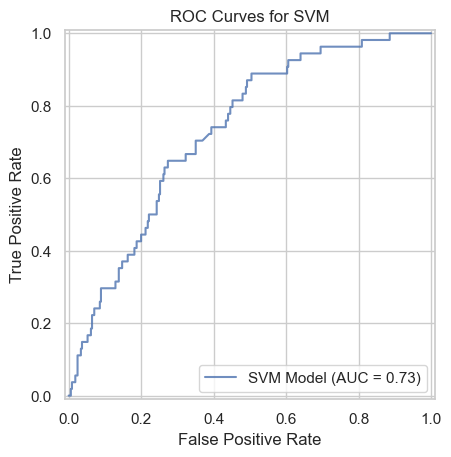

In [71]:
#cross-validation to compare models
from sklearn.model_selection import cross_val_score

# Define a function to evaluate models using cross-validation
def evaluate_model_cv(model, X, y, cv=5):
    scores = cross_val_score(model, X, y, cv=cv, scoring='f1')
    print(f"Cross-validated F1 scores: {scores}")
    print(f"Mean F1 score: {scores.mean():.3f} ± {scores.std():.3f}")

# Evaluate SVM model with interaction features
print("\n=== SVM Model Evaluation ===")
evaluate_model_cv(svm_model, X_val_svm_input, y_val_o)

# Plotting the ROC curves for both models
from sklearn.metrics import RocCurveDisplay
# Plot ROC curves for both models
plt.figure(figsize=(10, 6))
RocCurveDisplay.from_estimator(svm_model, X_val_svm_input, y_val_o, name="SVM Model", alpha=0.8)
plt.title("ROC Curves for SVM")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()


MAKING AN ENSEMBLE CLASSIFIER

In [72]:
# Average probabilities from both models
ensemble_prob = (y_val_svm_prob + y_val_rf_prob) / 2

# Apply threshold (try different ones, e.g. 0.3, 0.4 for better recall)
ensemble_threshold = 0.325
ensemble_pred = (ensemble_prob >= ensemble_threshold).astype(int)

# Evaluate ensemble model
evaluate_model("Ensemble Model(Soft Voting)", y_val_o, ensemble_pred, ensemble_prob)



=== Ensemble Model(Soft Voting) Evaluation ===
Confusion Matrix:
 [[160 165]
 [  8  46]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.49      0.65       325
           1       0.22      0.85      0.35        54

    accuracy                           0.54       379
   macro avg       0.59      0.67      0.50       379
weighted avg       0.85      0.54      0.61       379

ROC-AUC Score: 0.7123076923076923


In [73]:
#using a weighted soft voting approach
# Weighted average (e.g. SVM 70%, RF 30%)
ensemble_prob = (0.7 * y_val_svm_prob + 0.3 * y_val_rf_prob)

ensemble_threshold = 0.35 # Tune for recall
ensemble_pred = (ensemble_prob >= ensemble_threshold).astype(int)

# Evaluate ensemble model
evaluate_model("Weighted Ensemble Model", y_val_o, ensemble_pred, ensemble_prob)


=== Weighted Ensemble Model Evaluation ===
Confusion Matrix:
 [[160 165]
 [  8  46]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.49      0.65       325
           1       0.22      0.85      0.35        54

    accuracy                           0.54       379
   macro avg       0.59      0.67      0.50       379
weighted avg       0.85      0.54      0.61       379

ROC-AUC Score: 0.7241025641025641


In [74]:
#Threshold tuning for both models
from sklearn.metrics import recall_score

thresholds = np.arange(0.2, 0.6, 0.05)
for t in thresholds:
    preds = (ensemble_prob >= t).astype(int)
    r = recall_score(y_val_o, preds)
    
    print(f"Threshold: {t:.2f}, Recall: {r:.3f}," ,)


Threshold: 0.20, Recall: 0.963,
Threshold: 0.25, Recall: 0.963,
Threshold: 0.30, Recall: 0.926,
Threshold: 0.35, Recall: 0.852,
Threshold: 0.40, Recall: 0.815,
Threshold: 0.45, Recall: 0.741,
Threshold: 0.50, Recall: 0.593,
Threshold: 0.55, Recall: 0.500,



=== Weighted Ensemble Model on Test Set Evaluation ===
Confusion Matrix:
 [[295 348]
 [ 17  96]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.46      0.62       643
           1       0.22      0.85      0.34       113

    accuracy                           0.52       756
   macro avg       0.58      0.65      0.48       756
weighted avg       0.84      0.52      0.58       756

ROC-AUC Score: 0.7395092142749006


<Figure size 1000x600 with 0 Axes>

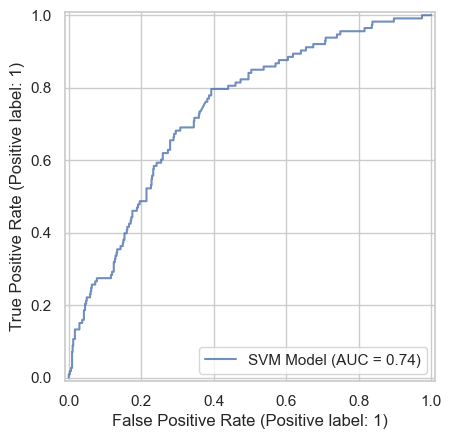

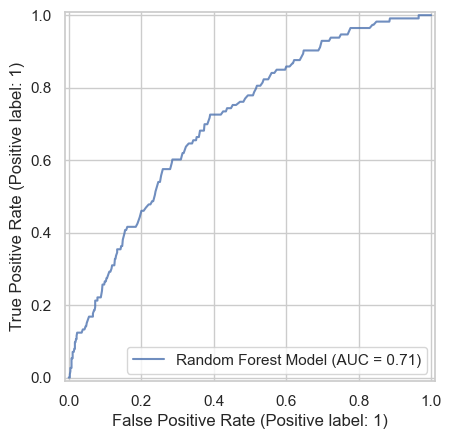

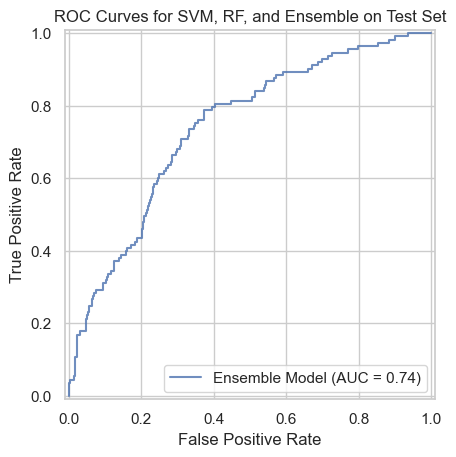

In [75]:
#using a weighted soft voting approach to evaluate the ensemble model on the test set
# Predict probabilities on the test set
X_test_svm_input = X_test_scaled_o_df[['age', 'sysBP', 'totChol', 'diaBP', 'glucose', 'heartRate', 'BMI', 'cigsPerDay']].copy()
y_test_svm_prob = svm_model.predict_proba(X_test_svm_input)[:, 1]
y_test_svm_tuned = (y_test_svm_prob >= svm_threshold).astype(int)

# Predict probabilities on the test set for RF
y_test_rf_prob = rf_model.predict_proba(X_test_reduced)[:, 1]
y_test_rf_tuned = (y_test_rf_prob >= rf_threshold).astype(int)

# Weighted average (e.g. SVM 70%, RF 30%)
ensemble_test_prob = (0.7 * y_test_svm_prob + 0.3 * y_test_rf_prob)
ensemble_test_pred = (ensemble_test_prob >= ensemble_threshold).astype(int)

# Evaluate ensemble model on test set
evaluate_model("Weighted Ensemble Model on Test Set", y_test_o, ensemble_test_pred, ensemble_test_prob)

#Evaluating the ensemble using roc and classification report
from sklearn.metrics import RocCurveDisplay

plt.figure(figsize=(10, 6))
RocCurveDisplay.from_estimator(svm_model, X_test_svm_input, y_test_o, name="SVM Model", alpha=0.8)
RocCurveDisplay.from_estimator(rf_model, X_test_reduced, y_test_o, name="Random Forest Model", alpha=0.8)
RocCurveDisplay.from_predictions(y_test_o, ensemble_test_prob, name="Ensemble Model", alpha=0.8)
plt.title("ROC Curves for SVM, RF, and Ensemble on Test Set")   
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()


In [80]:
#confusion matrix for the ensemble
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No MI", "MI"],
            yticklabels=["No MI", "MI"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Validation Set")
plt.show()

NameError: name 'cm' is not defined

<Figure size 500x400 with 0 Axes>

In [76]:
#creating a custom weighted ensemble class
class FixedWeightedEnsemble:
    def __init__(self, svm_weight=0.7, rf_weight=0.3, threshold=0.35):
        self.svm_weight = svm_weight
        self.rf_weight = rf_weight
        self.threshold = threshold
        self.svm_model = None
        self.rf_model = None
        self.svm_features = None
        self.rf_features = None

    def set_models(self, svm_model, rf_model):
        self.svm_model = svm_model
        self.rf_model = rf_model

    def set_feature_lists(self, svm_features, rf_features):
        self.svm_features = svm_features
        self.rf_features = rf_features

    def predict_proba(self, X_svm, X_rf):
        svm_prob = self.svm_model.predict_proba(X_svm)[:, 1]
        rf_prob = self.rf_model.predict_proba(X_rf)[:, 1]
        return self.svm_weight * svm_prob + self.rf_weight * rf_prob

    def predict(self, X_svm, X_rf):
        probs = self.predict_proba(X_svm, X_rf)
        return (probs >= self.threshold).astype(int)


In [77]:
#saving the model

# Initialize and configure your ensemble
final_ensemble = FixedWeightedEnsemble(svm_weight=0.7, rf_weight=0.3, threshold=0.35)
final_ensemble.set_models(svm_model, rf_model)
final_ensemble.set_feature_lists(svm_features, rf_features)

# Save the full ensemble bundle
joblib.dump({
    'model': final_ensemble,
    'svm_model': svm_model,
    'rf_model': rf_model,
    'svm_features': svm_features,
    'rf_features': rf_features,
    'weights': {'svm': 0.7, 'rf': 0.3},
    'threshold': 0.35
}, 'final_weighted_ensemble_model.joblib')


['final_weighted_ensemble_model.joblib']

In [78]:
#prediction function for the ensemble model
# Load ensemble
bundle = joblib.load('final_weighted_ensemble_model.joblib')
ensemble_model = bundle['model']

# Use the correct validation feature sets
# X_val_svm_input: SVM input features for validation
# X_val_reduced: RF input features for validation

# Predict risk probabilities
cvd_probs = ensemble_model.predict_proba(X_val_svm_input, X_val_reduced)

# Predict class labels based on threshold
cvd_preds = ensemble_model.predict(X_val_svm_input, X_val_reduced)


In [79]:
print("SVM Features:", svm_features)
print("RF Features:", rf_features)

SVM Features: ['age', 'sysBP', 'totChol', 'diaBP', 'glucose', 'heartRate', 'BMI', 'cigsPerDay']
RF Features: ['age', 'sysBP', 'totChol', 'diaBP', 'glucose', 'heartRate', 'BMI', 'cigsPerDay']
